_**Social Graphs and Interactions** - Project Assignment B  | December 2021_

Lluis Colomer - Anna Rifé

_**Visit our Website:**_ _https://sites.google.com/view/beatles-network/home?authuser=0_


In [1]:
#All the necessary packages we used for this project
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import plotly.express as px
import ast
import operator
import powerlaw
from fa2 import ForceAtlas2
import re
from urllib.request import urlopen
import urllib.request as urllib2
import os

import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.text import TextCollection
from nltk.stem import WordNetLemmatizer
import community.community_louvain
import community.community_louvain
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import spotipy
import spotipy.util as util
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials

import chart_studio
import chart_studio.tools as tls
import chart_studio.plotly as py
import plotly.io as pio

# <font color='darkgreen'> <center> <h3>The Network of Beatles Songs</h3> </center>
# <font color='green'> <center> <h4>Getting into Beatles' mind</h4> </center>
  
![Image](https://github.com/annarife99/Beatles_SocialGraphs/blob/main/Images/Beatles.jpg?raw=true)
    


**John Lennon**, **Paul McCartney**, **George Harrison** and **Ringo Starr**: The best-known members of the one of the greateast and most influential bands of all times: **The Beatles.** 

Smart, Idealistic, Playful, Irreverent, Eclectic, among many others. Their youth personification and unmatched innovation led their music, from the not-so-simple love songs they started with to their later perfectionistic studio extravaganzas. 

Led by primary songwriters Lennon and McCartney, the Beatles evolved from Lennon's previous group, and built their reputation playing clubs in Liverpool and Hamburg over three years from 1960. The core trio of Lennon, McCartney and Harrison, together since 1958, went through a succession of drummers, until Ringo Starr joined them in 1962. 

In the following years, the Beatles had an accomplished career, but mainly divided into three main periods of relatively similar productivity: the first stage started from the establishment of the band until their attaining worldwide popularity in 1964, the second was from 1965 to 1967 with the most creative and significant output of the group, and the final stage (from 1968 to 1970) where they were working more individually and the band finally folded in 1970. 

With this in mind, what has made us choose this current project and build the network of songs of one of the most influential bands of all times is presented below. 


## <font color='darkgreen'> 1. Motivation   
No band has influenced pop culture the way The Beatles have. They were integral to the development of 1960s counterculture and popular music's recognition as an art form.
        
Currenly, after 50 years of their retirement from the stage and with more than 200 songs on streaming servies, The Beatles' Songs are still present on a daily basis, still catchy and played all over the world, remaining forever and likley to be  passing down from generation to generation. But...
    
#### <center> What do the Lyrics of Beatles' Songs hide ? </center>
    
Thrilled with the idea, performing different analyses based on the lyrics of Beatles could reveal many interesting hidden facts over the career of the band. 
    
    
### <font color='green'> 1.1 _Our Dataset:_
All the data used in this project were mainly extracted from three different Web sites. Next, they are presented together with the code used to build the dataset. 
    
**1)** **[The Beatles official Page](https://www.thebeatles.com/)**. It has been of great relevance to be able to have a reliable list of all available Beatles Songs, representing the nodes of Beatles network, together with its corresponding lyrics. The lyrics were then used to define the edges of the network under a specific criteria. In that way, <u>Section 1.4.1</u>  shows the code to obtain the API of the Beatles song from their official page to extract the lyrics, consequently stored in a txt. file. 
    
**2)** **[The Beatles Wiki](https://beatles.fandom.com/wiki/The_Beatles_Wiki)**. It was created in 2006, and edited some years after, currently containing a total amount of 775 pages. It has represented our main source to extract information from the available wiki-pages of Beatles songs, such as its songwriter, its corresponding album and its release date to be used as the node attributes of the network. <u>Section 1.4.2</u>  presents the code to obtain the API of the Wiki-Pages of each Beatles song, which were consequently stored in a txt. file to extract all the necessary information. Nevertheless, few Wiki-pages of each corresponding song had some features missing, reason why the other two Web sites were used to counter that point. 

**3)** **[The Beatles Spotify Page](https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2)**. Their spotify profile was thought that could be used to find other minor attributes of each song related to music characterstics, such as the danceability, the key or tempo of each track. In <u>Section 1.4.3</u>, we present how the API of the Beatles Spotify Page was obtained. 

After considerable data extraction from txt. file of the different sources, its consequent cleaning and preprocessing steps _(all detailed in Section 2)_, we ended up with a total number of **301 songs** to be able to build the most exiciting Beatles network of all times.     
    
### <font color='green'> 1.2 _Why?_
After inspecting the literature, not many analysis have been focused on analyzing Beatles songs from a linguistic point of view, without revealing what makes their songs catchy and how they influenced each other. Fascinated by Beatles success and its music so many years after of their release, we were motivated enough to undertake the project of builing a network of Beatles songs and understand how could be related from a lyrics point of view. 
    
#### <center> Could we get into Beatles'mind ? </center>
    
### <font color='green'> 1.3 _Our Goal:_
The main aim of this project was to **build a Network of Beatles Songs** to be able to perform a deep analysis of the following points:
    
- Inspect how are Beatles songs related and inspired by each others, by also considering its songwritter. 
- Find communities of songs and their common particularities. 
- Perform a sentimental analysis to see which and how the most recurrent topics evoled over time. 
- Examine network growth to reveal Beatles' stages and their most inspirational years. 
    
Overall, the current project could provide insights into songs and group dynamics of the Beatles and reveal many other features. 

### <font color='green'> 1.4 _Code for Data Obtention:_

#### <font color='green'> 1.4.1 _Data Extraction from The Beatles Official Page:_
    
When considering The Beatles Official Page, a function `extract_html(url)` has been created to extract the necessary information from the Home Beatles page. Consequenly, making use of the following regular expressions patterns: (1) `'hreflang="en">(.*?)</a>'` and  (2) `'chronological-date">(.*?)</td>'`, a list of the title of songs presented in the Official Beatles page was obtained and its release date, respectively. 
Each release date was then stored in terms of the year, month and specific day of release, to be consequenty sorted from the first released songs to the last ones and stored in a csv. file for later use. 

From that Official Page, as presented below, **301 Beatles Songs** were obtained. 

In [2]:
#We have create a function to obtain the HTLM of the Main Page of Beatles Official Web-page- 
def extract_html(url):
    page = urlopen(url)
    html_bytes = page.read()
    html = html_bytes.decode("utf-8")
    return html

In [3]:
#We obtain all the list of songs and we stored it in the Variable songs_Titles
pattern1= 'hreflang="en">(.*?)</a>'
pattern2= 'chronological-date">(.*?)</td>'

songs_titles=[]
years=[]
months=[]
days=[]

#Number of subpages of the Home Beatles page. 
for i in range(0,9): 
    url = 'https://www.thebeatles.com/songs?page='+str(i)
    html=extract_html(url)
    a=re.findall(pattern1,html)
    b=re.findall(pattern2,html)
    
    for el in a:
        el=el.replace('&#039;', '\'')
        songs_titles.append(el)
    
    for date in b:
        date=date.split(' ')
        years.append(date[3])
        months.append(date[2][:-1])
        days.append(date[1][:-2])

data={'Song':songs_titles,'Year':years,'Month':months,'Day':days}
data_df=pd.DataFrame(data)
 

#The name of the month was replaced by its corresponding number for ease of order songs by its release date. 
months_value={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
             'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

months_sorted=data_df.replace({'Month': months_value}).sort_values(by=['Year','Month','Day']).index
data_df=data_df.reindex(months_sorted)
data_df=data_df.reset_index(drop=True)

print('The official Beatles page contains information of a number of' , len(songs_titles), 'songs.')
data_df.to_csv("Songs_Sorted_Years.csv",index=False)
data_df

The official Beatles page contains information of a number of 301 songs.


Song  Year     Month Day
0              Love Me Do  1962   October   5
1         P.S. I Love You  1962   October   5
2              Ask Me Why  1963   January  11
3        Please Please Me  1963   January  11
4        A Taste Of Honey  1963     March  22
..                    ...   ...       ...  ..
296      You Know My Name  2012  December  14
297  You Like Me Too Much  2012  December  14
298        Sie Liebt Dich  2013  February   7
299             Slow Down  2013  February   7
300   You Know What To Do  2013       May  16

[301 rows x 4 columns]

Secondly, the Beatles Official Page was also used to **extract the lyrics of the songs**, properly saved in a txt. file for further cleaning and pre-processing (_detailed in <u>Section 2.1</u>)_. In that way the following approach has been adopted:

1. Going through the title of all songs, the API from each web-page was again obtained to save all raw data in a txt. file, one for each song. 


In [5]:
remove_list=[' a ',' in ',' the ',' of ',' to ',' is ',' at ',' for ',' that ',' by ',' as ',' from ',' into ',
             ' on ',' with ',' off ',' this ',' up ',' like ']
remove_list_start=['a-','in-','the-','of-','to-','is-','at-','for-','that-','by-','as-','from-','like-','this-',
                  'with-']
remove_list_end=['-by','-to','-on','-is','-that','-before']
remove_list2=['\'','.','!','(',')',',','/',':']

songs_titles2=[]
for title in songs_titles:
    try:
        title=title.lower()
        for el in remove_list2: # delete special characters
            title=title.replace(el,'')
        for el in remove_list: # replace single words with a space
            title=title.replace(el,' ')
        title=title.replace(' ','-')
        title=title.replace('--','-')
        # delete words from the start
        for i in range(0,6):
            if title[:i] in remove_list_start:
                title=title[i:]
        # delete words from the end
        for i in range(0,8):
            if title[-i:] in remove_list_end:
                title=title[:-i]
        if title[0]=='-':
            title=title[1:]
        url='https://www.thebeatles.com/'
        query=extract_html(url+title)
        # write the extracted text in a .txt file
        file=open('raw_songs/'+title+'.txt','w+')
        file.write(query)
        file.close()
        songs_titles2.append(title)
        
    #To know the songs where the url could not be obtained. 
    except:
        print("The URL of", title, "song could not be obtained.")

The URL of words-love song could not be obtained.


As the "words-love" song could not be obtained due to the different format of its query, we manually stored its content. 

2. With all the raw text from each page of Beatles Song, the so-called function `extract_lyrics(song_path)` was created with the aim to just extracted the text with the lyrics part. Using the regular expressions detailed in `pattern3` and `pattern4`, we extracted the text between them and stored it in another txt. file.  Provided that the song has no lyrics, we classified it as an instrumental song and was not considered as part of our lyrics network.

As presented below, after lyrics extraction, we ended up with **206 songs with lyrics** and **95 instrumental songs**. 

In [6]:
pattern3='<div class="col-md-6 middle-content border-left border-right"><p>'
pattern4='<figure class="wp-block-table table-expander table table-imported">'
remove_list=['<br />','\n','</p>','<p>']

def extract_lyrics(song_path):
    song=open(song_path).read()
    idx_init = re.search(pattern3,song).end()
    idx_final = re.search(pattern4,song).start()
    lyrics=song[idx_init:idx_final]
    for el in remove_list: # delete special characters
        lyrics=lyrics.replace(el,' ')
    return lyrics

In [7]:
txt_files = os.listdir('raw_songs')
songs_no_lyrics=[]
for el in txt_files:
    el=el[:-4]
    song_path='raw_songs/'+el+'.txt'
    try:
        lyrics=extract_lyrics(song_path)
        file=open('lyrics_songs/'+el+'.txt','w+')
        file.write(lyrics)
        file.close()
    except:
        songs_no_lyrics.append(el)

        
lyrics_files = os.listdir('lyrics_songs')
for el in songs_no_lyrics:
    el=el[:-4]
    url='https://www.thebeatles.com/'
    # check if the song has lyrics or not
    for i in range(0,4):
        try:
            query=extract_html(url+el+'-'+str(i))
            idx_init = re.search(pattern6,query).end()
            idx_final = re.search(pattern7,query).start()
            # rewrite the extracted text in a .txt file
            file=open('raw_songs/'+el+'.txt','w+')
            file.write(query)
            file.close()
            print(el, i)
            break
        except:
            pass

In [8]:
#We add as an attribute of the songs whether it is an instrumental song or if it has lyrics. 
songs = pd.read_csv("Songs_Sorted_Years.csv")  
DataSongs=pd.DataFrame(songs)

lyrics_bool=[]
for song in list(DataSongs['Song']):
    if song in songs_no_lyrics:
        lyrics_bool.append('No')
    else:
        lyrics_bool.append('Yes')
        
DataSongs['Lyrics']=lyrics_bool
DataSongs.to_csv('Songs_Sorted_Years.csv',index=False)

In [11]:
songs = pd.read_csv("Songs_Sorted_Years.csv")  
DataSongs=pd.DataFrame(songs)

print('The official Beatles page contains' , len(DataSongs), 'Songs, with', len(DataSongs[DataSongs["Lyrics"]=="Yes"]),
     'Lyrics Songs and',len(DataSongs[DataSongs["Lyrics"]=="No"]),'Instrumental ones. ')

The official Beatles page contains 301 Songs, with 206 Lyrics Songs and 95 Instrumental ones. 


#### <font color='green'> 1.4.2 _Data Extraction from The Beatles Wiki:_



Secondly, we aimed to build the **API of the Wiki-pages of Beatles Songs** and saved its content in a txt. file.

In [14]:
songs_list=list(DataSongs.iloc[:,0])
songs_list_clean=[]
for el in songs_list: 
    el=el.replace('-','_')
    el_song=list(el)
    indexes=[]
    
    for ind, a in enumerate(el_song):
        if ind==0:
            indexes.append(ind) 
        if a=='_':
            indexes.append(ind+1)
            
    indexes_set=set(indexes)
    
    for i in indexes_set:
        el_song[i] = el_song[i].upper()

    string = ''.join(el_song)
    songs_list_clean.append(string)

In [16]:
#WRITER: Lennon&McCartney, McCartney, Lennon, Harrison, Ringo

writer=np.zeros(len(DataSongs))
album=np.zeros(len(DataSongs))
genre=np.zeros(len(DataSongs))

DataSongs['Writer']=writer
DataSongs['Album']=album
DataSongs['Song']=songs_list_clean

In [17]:
baseurl = "https://beatles.fandom.com/api.php?"
action = "action=query"  
content = "prop=revisions&rvprop=content&rvslots=*"
dataformat ="format=json"

for a in songs_list_clean:
    try:
        title = "titles="+str(a)
        Beatles = "{}{}&{}&{}&{}".format(baseurl, action, content, title,dataformat)
        urllib2.urlretrieve(Beatles , 'wiki_songs/'+str(a)+'.txt')
    except:
        print(a)

In [20]:
pages_path="./wiki_songs/"

for a in songs_list_clean:
    try:
        with open(pages_path+a+".txt","r") as f:
            wiki_song= f.read()
            writer= re.findall(r'\[\[Category:Songs written by (.*?)\]\]', wiki_song)

            if writer:
                if writer[0]=="Lennon\\u2013McCartney":
                    index=DataSongs.index[DataSongs['Song']==a].tolist()       
                    DataSongs['Writer'][index]= 'Lennon/McCartney'

                else:
                    index=DataSongs.index[DataSongs['Song']==a].tolist() 
                    DataSongs['Writer'][index]= writer[0]


            else:
                index=DataSongs.index[DataSongs['Song']==a].tolist()       
                DataSongs['Writer'][index]= 'Not found'
    except:
        pass

In [21]:
i=0
refill_songs=[]
for a in songs_list_clean:
    with open(pages_path+a+".txt","r") as f:
        wiki_song= f.read()
        writer= re.findall(r'\[\[Category:Songs written by (.*?)\]\]', wiki_song)
        
        if writer: #82 songs with writer
            i=i+1
            if writer[0]=="Lennon\\u2013McCartney":
                index=DataSongs.index[DataSongs['Song']==a].tolist()       
                DataSongs['Writer'][index]= 'Lennon/McCartney'
                
            else:
                index=DataSongs.index[DataSongs['Song']==a].tolist() 
                DataSongs['Writer'][index]= writer[0]
                
        else: #219 missing
            refill_songs.append(a)
            index=DataSongs.index[DataSongs['Song']==a].tolist()       
            DataSongs['Writer'][index]= 'Not found'

DataSongs

Song  Year      Month  Day Lyrics  \
0                      Love_Me_Do  1962    October    5    Yes   
1                   Ps_I_Love_You  1962    October    5    Yes   
2                      Ask_Me_Why  1963    January   11    Yes   
3                Please_Please_Me  1963    January   11     No   
4                     Taste_Honey  1963      March   22     No   
..                            ...   ...        ...  ...    ...   
296              You_Know_What_Do  1995   November   20    Yes   
297  You_Never_Give_Me_Your_Money  1969  September   26    Yes   
298                Sie_Liebt_Dich  1964      March    5    Yes   
299                     Slow_Down  1958      March    7     No   
300               You_Me_Too_Much  1965     August    6    Yes   

               Writer  Album  
0    Lennon/McCartney    0.0  
1           Not found    0.0  
2    Lennon/McCartney    0.0  
3           Not found    0.0  
4           Not found    0.0  
..                ...    ...  
296         Not found    0.0  
297  Lennon/McCartney    0.0  
298         Not found    0.0  
299         Not found    0.0  
300         Not found    0.0  

[301 rows x 7 columns]

In [22]:
#Array to save all the Wiki Pages related to albums. 
Albums_pages= ['Sgt._Pepper%27s_Lonely_Hearts_Club_Band_(album)','Let_It_Be_(album)','Hey_Jude_(album)',
               'Help!_(album)','A_Hard_Day%27s_Night_(album)','With_the_Beatles','Please_Please_Me_(album)',
              'Beatles_for_Sale','Yellow_Submarine_Songtrack','Introducing...The_Beatles','Yesterday_and_Today']
Albums_name=['Sgt_Peppers_Lonely_Hearts_Club_Band','Let_It_Be','Hey_Jude','Help!','A_Hard_Days_Night',
             'With_the_Beatles','Please_Please_Me','Beatles_for_Sale','Yellow_Submarine_Songtrack',
            'Introducing...The_Beatles','Yesterday_and_Today']

In [24]:
#Save Album Wiki-Pages
for page in Albums_pages:
    title = "titles="+str(page)
    Album_Page = "{}{}&{}&{}&{}".format(baseurl, action, content, title,dataformat)
    urllib2.urlretrieve(Album_Page  , 'wiki_albums/'+str(page)+'.txt')

In [26]:
pages_path="./wiki_albums/"
artists=['Lennon/McCartney','Paul McCartney|McCartney','Lennon/McCartney|Lennon with McCartney','George Harrison',
         'George Harrison|Harrison','John Lennon','John Lennon|Lennon','Ringo Starr|Starkey','Ringo Starr|Starr',
        'Chuck Berry','Lennon/McCartney|McCartney with Lennon','Lennon/McCartney|McCartney/Lennon',
        'Little Richard|Richard Penniman','George Martin','Vee Jay Records|Vee Jay','Paul McCartney',
        'Ringo Starr|Richard Starkey']

#General Regular Expression for Wiki-Pages of all albums
Tracks='(?:==Tracks==|==Track listing==)'
TotalLength='Total Length'
Credits='(?:Credits|==References==|==American release==|==Personnel==|==External links==)'
pattern_songs_albums="\[\[(.*?)\]\]"

Songs_Albums=[] #Array to store all the Songs from an album
All_Years=[]
All_Albums=[]

for j,page in enumerate(Albums_pages):
    with open(pages_path+page+".txt","r") as f:
        wiki_album= f.read()
        
        #Release Date of the Album
        album_drelease= re.findall(r'release date(.*?)recorded',wiki_album)
        if album_drelease:
            album_yrelease= re.findall(r'\d\d\d\d',album_drelease[0])
        else:
            album_yrelease= re.findall(r'19\d\d',wiki_album)
        
            
        songs=re.findall(r"\[\[(.*?)\]\]",wiki_album)
 

        a=[(m.start(0), m.end(0)) for m in re.finditer(Tracks, wiki_album)]
        if len(a)!=1:
            a=a[1]
        else:
            a=a[0]
        b=[(m.start(0), m.end(0)) for m in re.finditer(TotalLength, wiki_album)]
        if len(b)>0:
            b=b[1]
        else:
            c=[(m.start(0), m.end(0)) for m in re.finditer(Credits, wiki_album)]
            if len(c)>0:
                b=c[0]
            else:
                b=(a[0]+600,a[1]+600)


        ind_songs=[(m.start(0), m.end(0)) for m in re.finditer(pattern_songs_albums, wiki_album)]
        songs=re.findall(r"\[\[(.*?)\]\]",wiki_album)
        
        Songs=[]
        for i,count in enumerate(ind_songs):
            if count[0] > a[1] and count[0] < b[0]:
                if songs[i] not in artists:
                    if re.findall(r"song",songs[i]):
                        r=[(m.start(0), m.end(0)) for m in re.finditer("song", songs[i])]
                        Songs.append(songs[i][0:r[0][0]-1])
                        
                    else:
                        if page=='Introducing...The_Beatles':
                            no_include=['Ask Me Why',"Please Please Me"]
                            
                            if songs[i] not in no_include:
                                Songs.append(songs[i])
                                
                        else:
                            Songs.append(songs[i])
                  
        
        year=np.full(len(Songs), album_yrelease[0])
        All_Years.extend(year)
        album=np.full(len(Songs), Albums_name[j])
        All_Albums.extend(album)
        Songs_Albums.extend(Songs)

In [27]:
DataAlbums= pd.DataFrame(Songs_Albums,columns=['Songs']) 
DataAlbums['Album']=All_Albums
DataAlbums['Release Year']=All_Years

DataAlbums.to_csv('AllAlbums.txt',index=False)
DataSongs.to_csv('AllAtributes.txt',index=False)

#### <font color='green'> 1.4.3 _Data Extraction from The Beatles Spotify Page:_

In [ ]:
SPOTIPY_CLIENT_ID = "fd50ff911d1d46079f0df6b9e7c71572"
SPOTIPY_CLIENT_SECRET = "2ecb8564def04ead945c43c9d8343b3d"
BEATLES_ID='3WrFJ7ztbogyGnTHbHJFl2'
BEATLES_PLAYLIST_ID='37i9dQZF1DXdLtD0qszB1w'
SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)

In [ ]:
birdy_uri = 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET))

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

#### <font color='green'> 1.4.4 _To an unique Dataset:_

In [36]:
Songs = pd.read_csv("AllAtributes.txt") 
DataSongs=pd.DataFrame(Songs)

Albums = pd.read_csv("AllAlbums.txt")
DataAlbums=pd.DataFrame(Albums)

AllSongs = pd.read_csv("Beatles_Dataset.csv")
DataAllSongs=pd.DataFrame(AllSongs)

DataSongs['Album']='Single'

In [42]:
actual=[]

for indS,a in enumerate(DataSongs['Song']):

    a=a.replace('_',' ')
    #Complete Artist
    if DataSongs['Writer'][indS]=='Not found':
        if a in list(DataAllSongs['Title']): 
            indW=DataAllSongs.index[DataAllSongs['Title']==a].tolist()[0]
            DataSongs['Writer'][indS]=DataAllSongs['Songwriter'][indW]
        else:
            actual.append(a)

    #Complete Albums
    if a in list(DataAlbums['Songs']):
        indA=DataAlbums.index[DataAlbums['Songs']==a].tolist()[0]
        DataSongs['Album'][indS]=DataAlbums['Album'][indA]
    else:
        if a in list(DataAllSongs['Title']):
            indAA=DataAllSongs.index[DataAllSongs['Title']==a].tolist()[0]
            DataSongs['Album'][indS]=DataAllSongs['Album.debut'][indAA]
    

DataSongs.to_csv('AllAllAtributes.txt',index=False)
DataSongs

/opt/anaconda3/envs/socialGraphs/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/socialGraphs/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Song  Year      Month  Day Lyrics  \
0                      Love_Me_Do  1962    October    5    Yes   
1                   Ps_I_Love_You  1962    October    5    Yes   
2                      Ask_Me_Why  1963    January   11    Yes   
3                Please_Please_Me  1963    January   11     No   
4                     Taste_Honey  1963      March   22     No   
..                            ...   ...        ...  ...    ...   
296              You_Know_What_Do  1995   November   20    Yes   
297  You_Never_Give_Me_Your_Money  1969  September   26    Yes   
298                Sie_Liebt_Dich  1964      March    5    Yes   
299                     Slow_Down  1958      March    7     No   
300               You_Me_Too_Much  1965     August    6    Yes   

                                    Writer  \
0                         Lennon/McCartney   
1                                Not found   
2                         Lennon/McCartney   
3                                   Lennon   
4                                Not found   
..                                     ...   
296                              Not found   
297                       Lennon/McCartney   
298  Lennon and McCartney/Nicolas/Montague   
299                               Williams   
300                              Not found   

                                          Album  
0                              Please_Please_Me  
1                                        Single  
2                              Please_Please_Me  
3    UK: Please Please Me US: The Early Beatles  
4                                        Single  
..                                          ...  
296                                      Single  
297                                  Abbey Road  
298                   UK: Rarities US: Rarities  
299   UK: Rock 'n' Roll Music US: Something New  
300                                      Single  

[301 rows x 7 columns]

Song  Year      Month  Day Lyrics  \
0                      Love_Me_Do  1962    October    5    Yes   
1                   Ps_I_Love_You  1962    October    5    Yes   
2                      Ask_Me_Why  1963    January   11    Yes   
3                Please_Please_Me  1963    January   11     No   
4                     Taste_Honey  1963      March   22     No   
..                            ...   ...        ...  ...    ...   
296              You_Know_What_Do  1995   November   20    Yes   
297  You_Never_Give_Me_Your_Money  1969  September   26    Yes   
298                Sie_Liebt_Dich  1964      March    5    Yes   
299                     Slow_Down  1958      March    7     No   
300               You_Me_Too_Much  1965     August    6    Yes   

                                    Writer  \
0                         Lennon/McCartney   
1                         Lennon/McCartney   
2                         Lennon/McCartney   
3                                   Lennon   
4                                Not found   
..                                     ...   
296                               Harrison   
297                       Lennon/McCartney   
298  Lennon and McCartney/Nicolas/Montague   
299                               Williams   
300                       McCartney/Lennon   

                                         Album  
0                             Please_Please_Me  
1                             Please_Please_Me  
2                             Please_Please_Me  
3                             Please_Please_Me  
4                             Please_Please_Me  
..                                         ...  
296                                Anthology 1  
297                                 Abbey Road  
298                  UK: Rarities US: Rarities  
299  UK: Rock 'n' Roll Music US: Something New  
300                                     Help!   

[301 rows x 7 columns]

## <font color='darkgreen'> 2. Basic Statistics

In [165]:
#Read All Data
DataSongs = pd.read_csv("AllAllAtributes.txt") 
DataSongs

Song  Year      Month  Day Lyrics  \
0                      Love_Me_Do  1962    October    5    Yes   
1                   Ps_I_Love_You  1962    October    5    Yes   
2                      Ask_Me_Why  1963    January   11    Yes   
3                Please_Please_Me  1963    January   11     No   
4                     Taste_Honey  1963      March   22     No   
..                            ...   ...        ...  ...    ...   
296              You_Know_What_Do  1995   November   20    Yes   
297  You_Never_Give_Me_Your_Money  1969  September   26    Yes   
298                Sie_Liebt_Dich  1964      March    5    Yes   
299                     Slow_Down  1958      March    7     No   
300               You_Me_Too_Much  1965     August    6    Yes   

                                    Writer  \
0                         Lennon/McCartney   
1                         Lennon/McCartney   
2                         Lennon/McCartney   
3                                   Lennon   
4                                Not found   
..                                     ...   
296                               Harrison   
297                       Lennon/McCartney   
298  Lennon and McCartney/Nicolas/Montague   
299                               Williams   
300                       McCartney/Lennon   

                                         Album  
0                             Please_Please_Me  
1                             Please_Please_Me  
2                             Please_Please_Me  
3                             Please_Please_Me  
4                             Please_Please_Me  
..                                         ...  
296                                Anthology 1  
297                                 Abbey Road  
298                  UK: Rarities US: Rarities  
299  UK: Rock 'n' Roll Music US: Something New  
300                                     Help!   

[301 rows x 7 columns]

### <font color='green'> 2.1 _Data Cleaning and Preprocessing:_

        
Once the lyrics had been extracted, it was needed to clean it as much as possible. With cleaning, it is meant deleting all those words and characters that do not add any special information to the text. It would not make sense to connect two songs just because they share a preposition or a conjunction, which are mainly the most common words in any language.

Thus, in order to achive so, the _clean_lyrics( )_ function shown below has been created.

    
What this function basically does is first clean and then tokenize the lyrics. To accomplish the cleaning part, first it removes any punctuation sign from the lyrics. Then it removes anys special characters that had been left when extracting it form the webpages api, such as _\n_, =_ or empty spaces. Finally, it sets every word to lower case, and deletes all that ones that are not contained in the _nltk.corpus_ stopswords library.


In [43]:
stop_words = list(set(stopwords.words('english')))
stop_words = [el.replace('\'','') for el in stop_words]
stop_words.append('im')

<font color='darkblue'> A function to **clean the lyrics** is built.

In [44]:
def clean_lyrics(file_path):
    data=open(file_path).read()
    # import WordPunctTokenizer() method from nltk
    # Create a reference variable for Class WordPunctTokenizer
    tk = WordPunctTokenizer()
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # remove punctuation from the string
    no_punct = ""
    for char in data:
        if char not in punctuations:
            no_punct = no_punct + char
    # Remove all the special characters as \n and single = left
    char=['\n','=']
    for el in char:
        raw=re.sub(el,'',no_punct)
    # remove stop words
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_final = [x for x in token_txt if x not in stop_words and len(x)>2]
    return token_final

In [45]:
def clean_title(title):
    remove_list=[' a ',' in ',' the ',' of ',' to ',' is ',' at ',' for ',' that ',' by ',' as ',' from ',' into ',
                 ' on ',' with ',' off ',' this ',' up ',' like ']
    remove_list_start=['a-','in-','the-','of-','to-','is-','at-','for-','that-','by-','as-','from-','like-','this-',
                      'with-']
    remove_list_end=['-by','-to','-on','-is','-that','-before']
    remove_list2=['\'','.','!','(',')',',','/',':','\’','?']

    pattern6='<div class="col-md-6 middle-content border-left border-right"><p>'
    pattern7='<figure class="wp-block-table table-expander table table-imported">'
    try:
        title=title.lower()
        for el in remove_list2: # delete special characters
            title=title.replace(el,'')
        for el in remove_list: # replace single words with a space
            title=title.replace(el,' ')
        title=title.replace(' ','-')
        title=title.replace('--','-')
        # delete words from the start
        for i in range(0,6):
            if title[:i] in remove_list_start:
                title=title[i:]
        # delete words end
        for i in range(0,8):
            if title[-i:] in remove_list_end:
                title=title[:-i]
        if title[0]=='-':
            title=title[1:]
        return title
    except:
        print(title)

In [122]:
DataSongs['Song']=[clean_title(title).replace('_','-') for title in DataSongs['Song']]
DataSongs.head()

Song  Year    Month  Day Lyrics            Writer  \
0        love-me-do  1962  October    5    Yes  Lennon/McCartney   
1     ps-i-love-you  1962  October    5    Yes  Lennon/McCartney   
2        ask-me-why  1963  January   11    Yes  Lennon/McCartney   
3  please-please-me  1963  January   11     No            Lennon   
4       taste-honey  1963    March   22     No         Not found   

              Album  
0  Please_Please_Me  
1  Please_Please_Me  
2  Please_Please_Me  
3  Please_Please_Me  
4  Please_Please_Me

In [123]:
lyrics_files = os.listdir('lyrics_songs')
for file in lyrics_files:
    path='lyrics_songs/'+file
    clean=clean_lyrics(path)
    file=open('clean_lyrics/'+file,'w+')
    for word in clean:
        file.write(word)
        file.write(' ')
    file.close()

## <font color='darkgreen'> 3. Tools, theory and analysis

### <font color='green'> 3.1 _Builing the Network:_
    
In order to accomplish one of the main goals of this project, that was connecting songs (nodes) between them depending on if they shared one at least of their common words according to tdf-if index, special emphasis has been put on text processing. Here we must distinguish between data extraction and preprocessing on one side, and sentimental analysis on the other. Let's focus now on the first part.
    
    
To connect the links we decided to go a step further and establish the linking criteria not on which were the most common words from each song, but on which were the five words in each song with higher tc-idf score. To do so, basically tc and idf has been computed, to finally compute tc-idf for each word and each song while storing the values in a dictionary. Then the dicctionary was sorted according to its values, and thus the five words with higher tc-idf score values were picked for each song.

In [124]:
def tc(corpus):
    """ Calculates the term count for each word """
    tc_dict = {}
    for song in corpus.fileids():
        text = nltk.Text(corpus.words(song))
        tc_dict[song[:-4]] = dict(FreqDist(text))
    return tc_dict

def idf(corpus):
    """ Calculates the IDF for each word in the corpus"""
    text = TextCollection(corpus)
    idf_dict = {}
    for word in set(corpus.words()):
        idf_dict[word] = text.idf(word)
    return idf_dict

def tc_idf(corpus):
    """ Calculates the TC-IDF for each word in the corpus, and returns it as a dictionary """
    tc_dict = tc(corpus)
    idf_dict = idf(corpus)
    tc_idf_dict = {}
    songs = list(tc_dict.keys())
    for song in songs:
        tc_idf_dict[song] = {}
        for key, value in tc_dict[song].items():
            tc_idf_dict[song][key] = value * idf_dict[key]
    return tc_idf_dict

In [125]:
lyrics_files=[el[:-4] for el in os.listdir('lyrics_songs')]
file_list = os.listdir("lyrics_songs")

In [126]:
corpus = PlaintextCorpusReader('clean_lyrics',file_list)
corpus

<PlaintextCorpusReader in '/Users/annarife/Documents/GitHub/Beatles_SocialGraphs/clean_lyrics'>

We save the tc-idf values of the corpus as a dict, and we order each song from the lower to the higher tc-idf value.

In [127]:
tc_idf_dict=tc_idf(corpus)
for el in tc_idf_dict:
    tc_idf_dict[el]=sorted(tc_idf_dict[el].items(), key=lambda item: item[1])

Now let's create a dictionary to store the links.
To create the hyperlinks a double loop has been created, iterating over all the songs. So, when the external loop picks a song, the inner loop iterates all over the songs, comparing each inner song with the external one. Thus, if between each pair of songs a word is shared, it is stored as they have equal word/s in common. Finally, to decide how the links are directioned, we pick the _Year_ attribute from both songs. Between each pair of songs, the song that was realeased earlier will point towards the other one.

Once all this has been done, the network is created by using the _nx.DiGraph()_ command. Each song name is added as a node, an each link stored before is added as mentioned above. Finally, to perform a better analysis of how the songs are related with, the GCC component is extracted.


In [128]:
def create_hyperlinks(lyrics_files,tc_idf_top5):
    hyperlinks={} #dictionary to store links 

    for file1 in lyrics_files:
        eq_files=[]
        for file2 in lyrics_files:
            if file1!=file2:
                a=tc_idf_top5[file1]
                b=tc_idf_top5[file2]
                # compute if there are equal words in both lists
                eq=0

                for el in a:
                    if el in b:
                        eq+=1
                if eq!=0:
                    eq_files.append(file2)

        idx1=DataSongs[DataSongs['Song']==file1].index[0]

        eq_files_later=[]

        for eq in eq_files:
            idx2=DataSongs[DataSongs['Song']==eq].index[0]
            if idx1<idx2: # means that file1 song was released earlier
                eq_files_later.append(eq)

        hyperlinks[file1]=eq_files_later
    return hyperlinks

In [129]:
DataSongs.head()

Song  Year    Month  Day Lyrics            Writer  \
0        love-me-do  1962  October    5    Yes  Lennon/McCartney   
1     ps-i-love-you  1962  October    5    Yes  Lennon/McCartney   
2        ask-me-why  1963  January   11    Yes  Lennon/McCartney   
3  please-please-me  1963  January   11     No            Lennon   
4       taste-honey  1963    March   22     No         Not found   

              Album  
0  Please_Please_Me  
1  Please_Please_Me  
2  Please_Please_Me  
3  Please_Please_Me  
4  Please_Please_Me

<font color='darkblue'> With the links stored, we are able to build the directed Graph based on the date release of the corresponding songs. 

In [130]:
def build_network(lyrics_files,hyperlinks):
    #We build the Directed Network
    Beatles_nw= nx.DiGraph()
    for file in lyrics_files:
        #We add the nodes and attributes to the the network
        file=file.replace('-',' ')
        Beatles_nw.add_node(file)

    #We add the hyperlinks to the the network
    for el in lyrics_files:
        links= hyperlinks[el]
        for a in links:
            u= el
            v= a
            u=u.replace('-',' ')
            v=v.replace('-',' ')
            Beatles_nw.add_edge(u,v)
    return Beatles_nw

<font color='darkblue'> Next, we extract the **GCC** subgraph of the Beatles network.

In [131]:
def extract_GCC(Beatles_nw):
    Gs = list(Beatles_nw.subgraph(c).copy() for c in nx.weakly_connected_components(Beatles_nw))
    biggest = 0
    GCC_index = 0
    for index,graph in enumerate(Gs):
        if len(graph.nodes) > biggest:
            biggest = len(graph.nodes)
            GCC_index = index
    GCC = Gs[GCC_index]
    print('- Considering the GCC of the Beatles Network, it has',len(GCC.nodes()),'number of nodes and',
      len(GCC.edges.data()),'number of links.')
    return GCC

To determine the criteria of how many words should be chosen according to the tc-idf score when establishing the links between nodes, we will prioratize the threshold that gives us higher modularity when finding communities in our songs


    - Determining a criteria about which should be the accurate number of words chosen (no crec q calgui posar totes les imatges i si si, ho faria amb un subplot maybe)
    
To determine the criteria of how many words should be chosen according to the tc-idf score when establishing the links between nodes, an optimal point had to be found between prioratizing the threshold that gave us higher modularity when aiming to find communities in our songs, and obtaining a sufficient of nodes and links that makes the analysis of the network significant.

To do so, a loop has been created to see how the network size and shape evolves as the number of words per song to establish the comparison increases.

Threshold:  2
- Considering the GCC of the Beatles Network, it has 9 number of nodes and 14 number of links.
Number of communities found:  2
The modularity value is: 0.263
The distribution of the community sizes


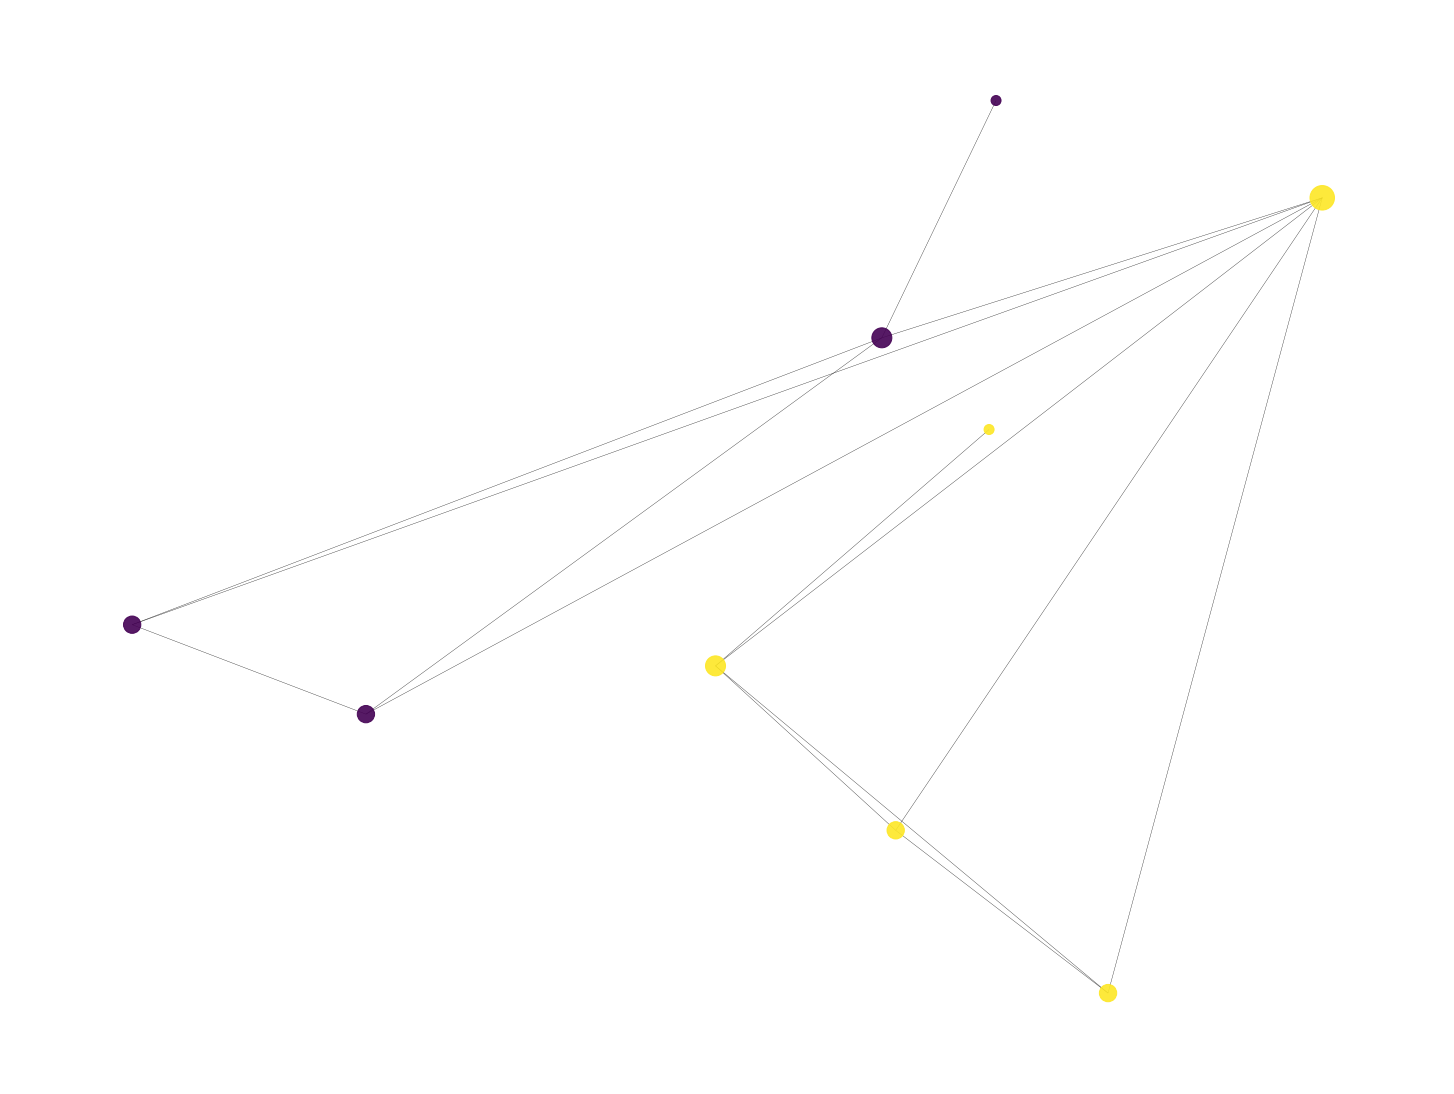

Threshold:  3
- Considering the GCC of the Beatles Network, it has 70 number of nodes and 117 number of links.
Number of communities found:  9
The modularity value is: 0.723
The distribution of the community sizes


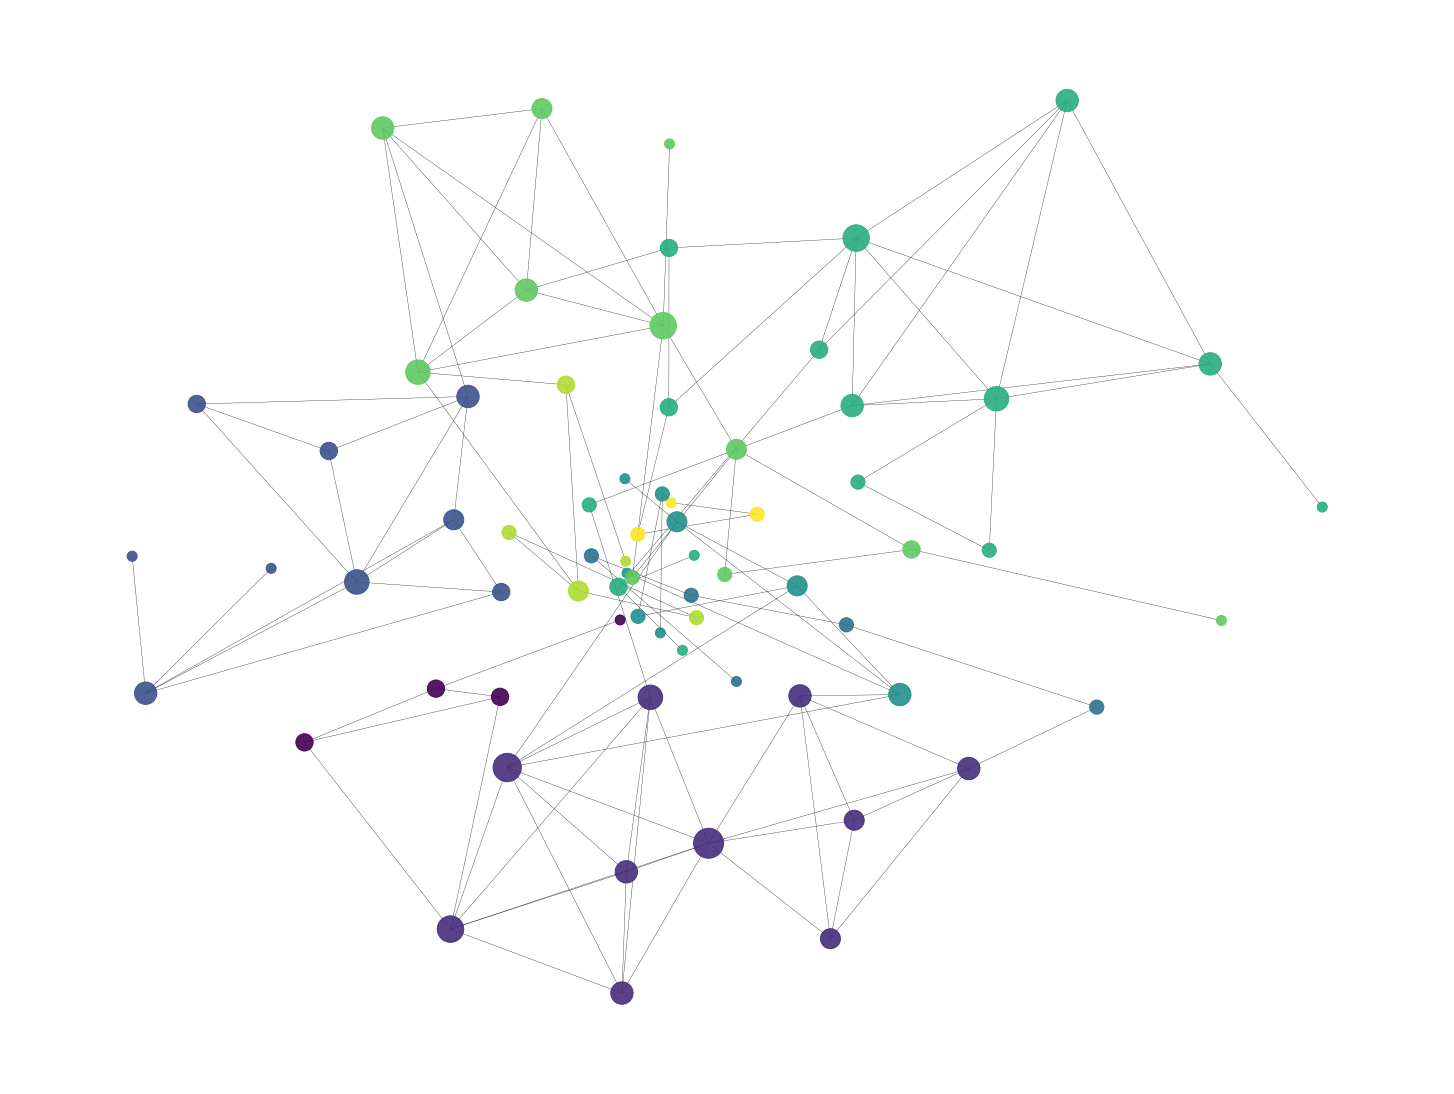

Threshold:  4
- Considering the GCC of the Beatles Network, it has 132 number of nodes and 296 number of links.
Number of communities found:  11
The modularity value is: 0.701
The distribution of the community sizes


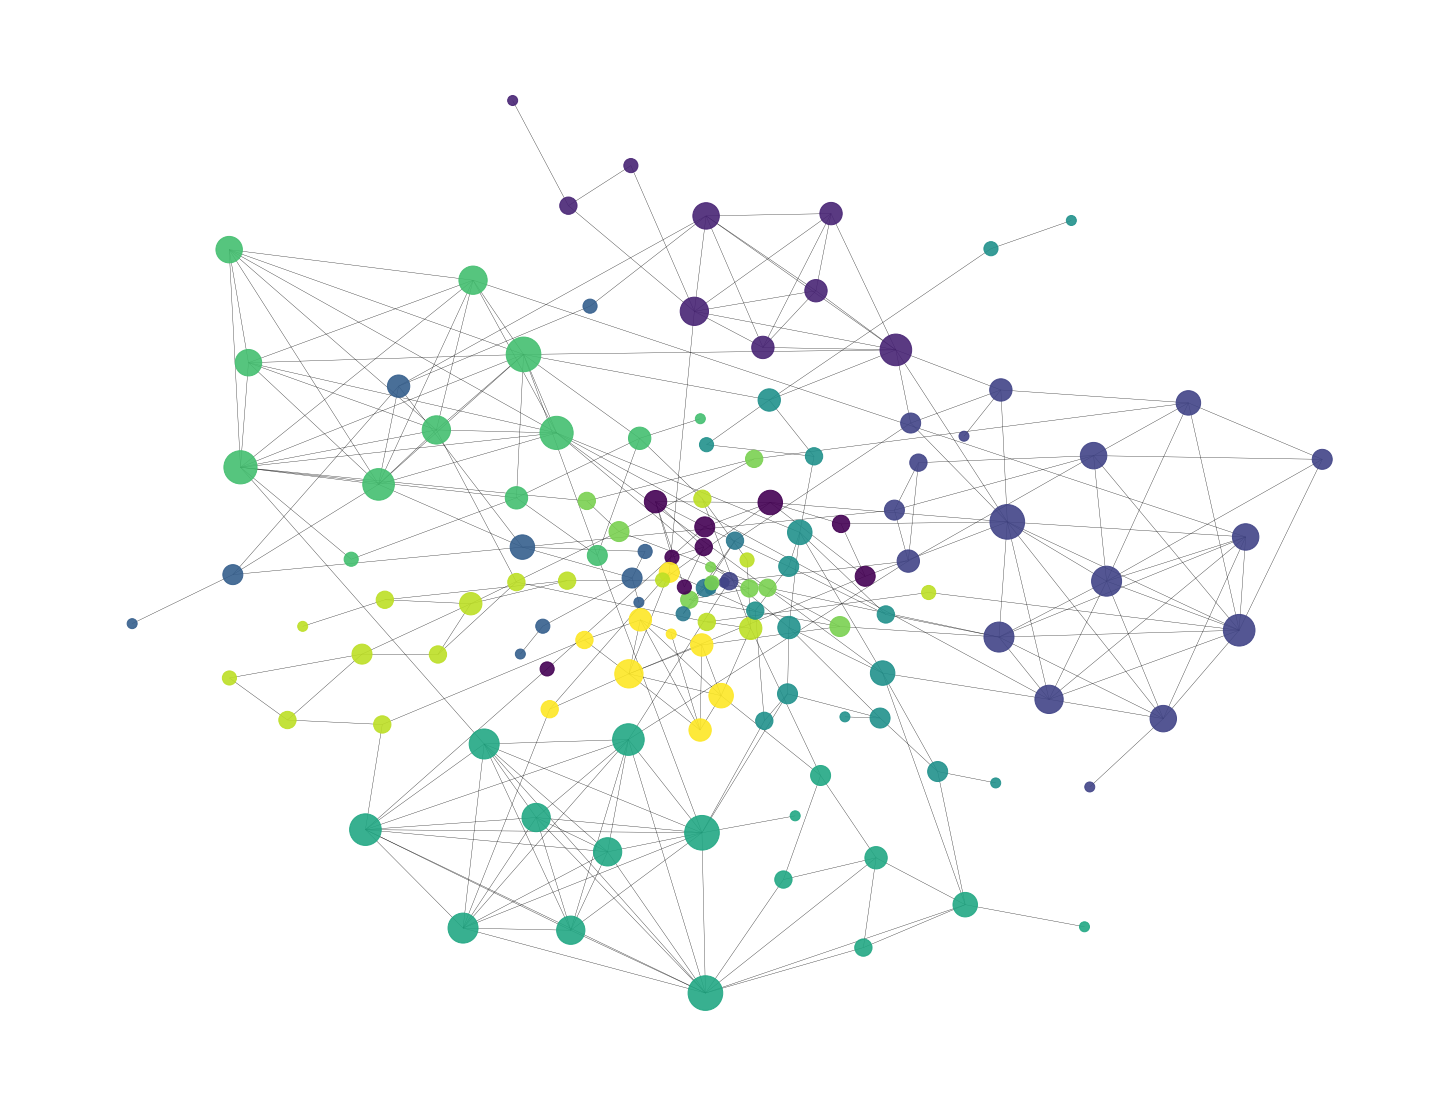

Threshold:  5
- Considering the GCC of the Beatles Network, it has 173 number of nodes and 480 number of links.
Number of communities found:  11
The modularity value is: 0.591
The distribution of the community sizes


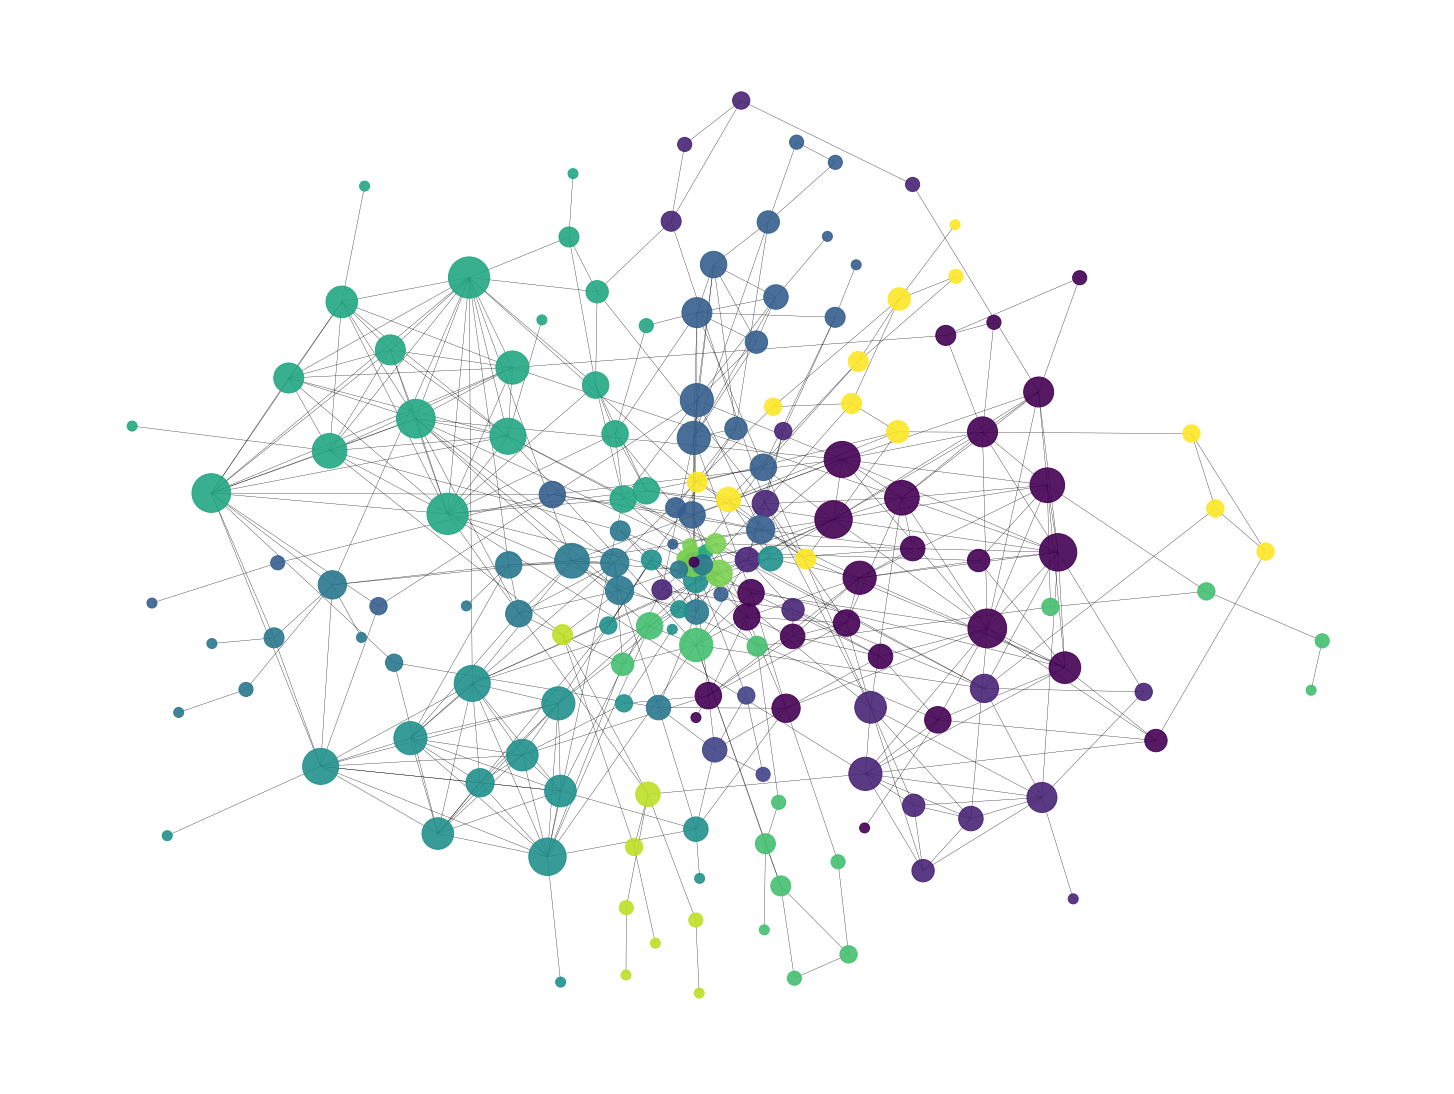

Threshold:  6
- Considering the GCC of the Beatles Network, it has 183 number of nodes and 691 number of links.
Number of communities found:  9
The modularity value is: 0.502
The distribution of the community sizes


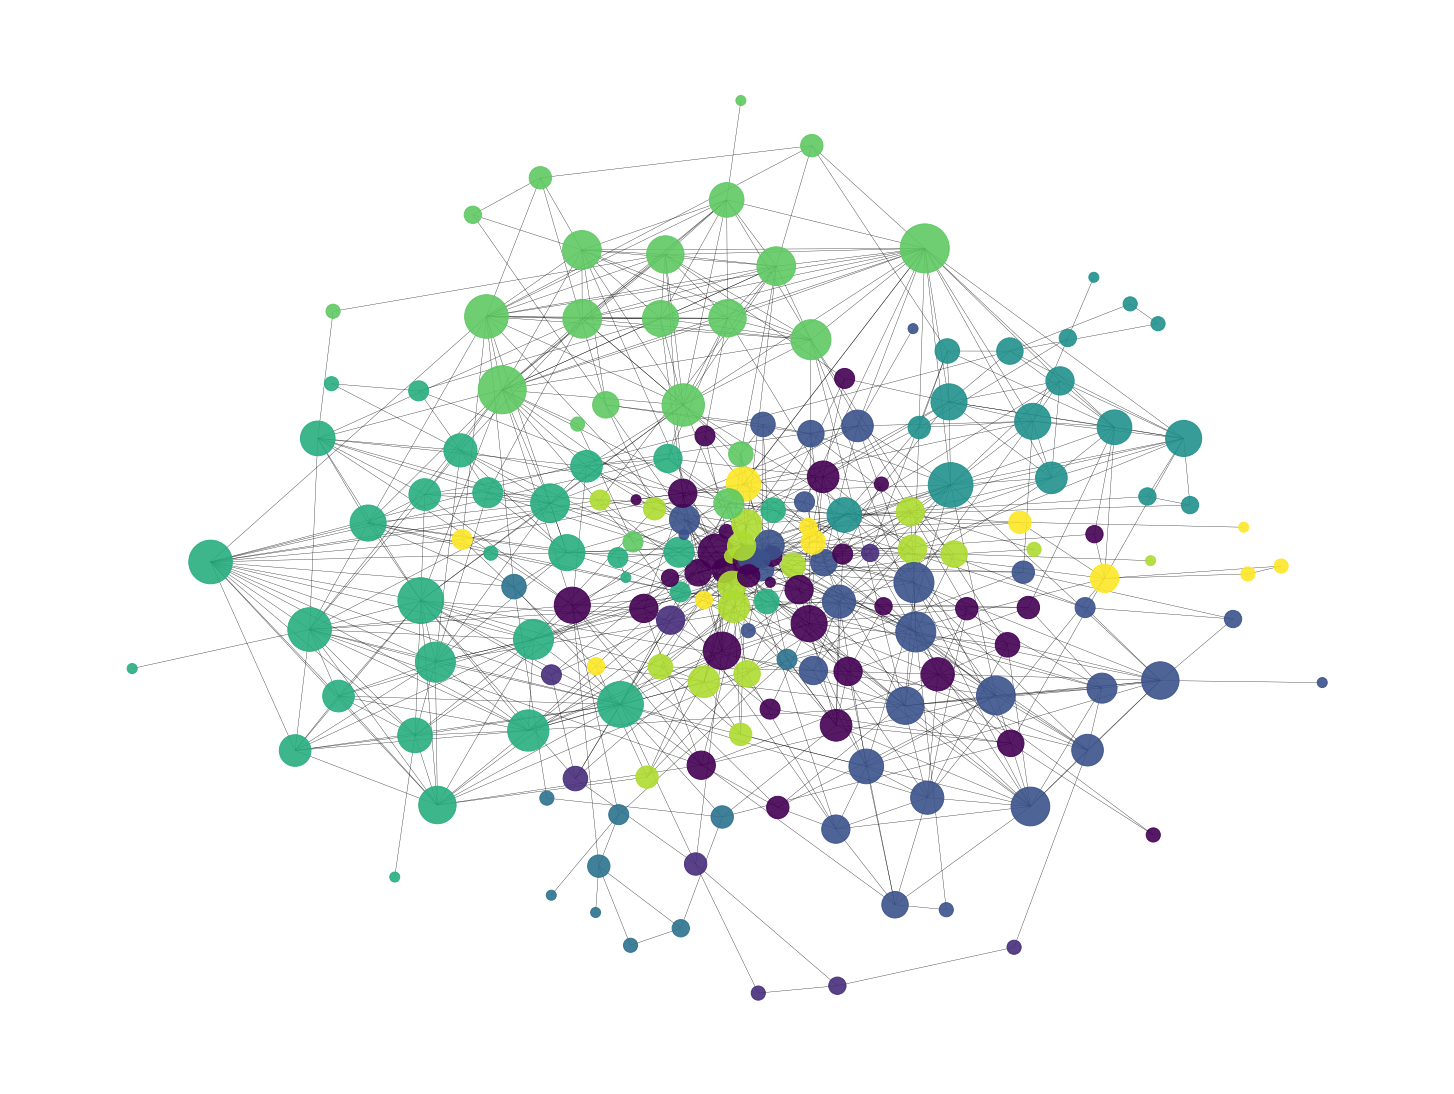

Threshold:  7
- Considering the GCC of the Beatles Network, it has 188 number of nodes and 946 number of links.
Number of communities found:  9
The modularity value is: 0.435
The distribution of the community sizes


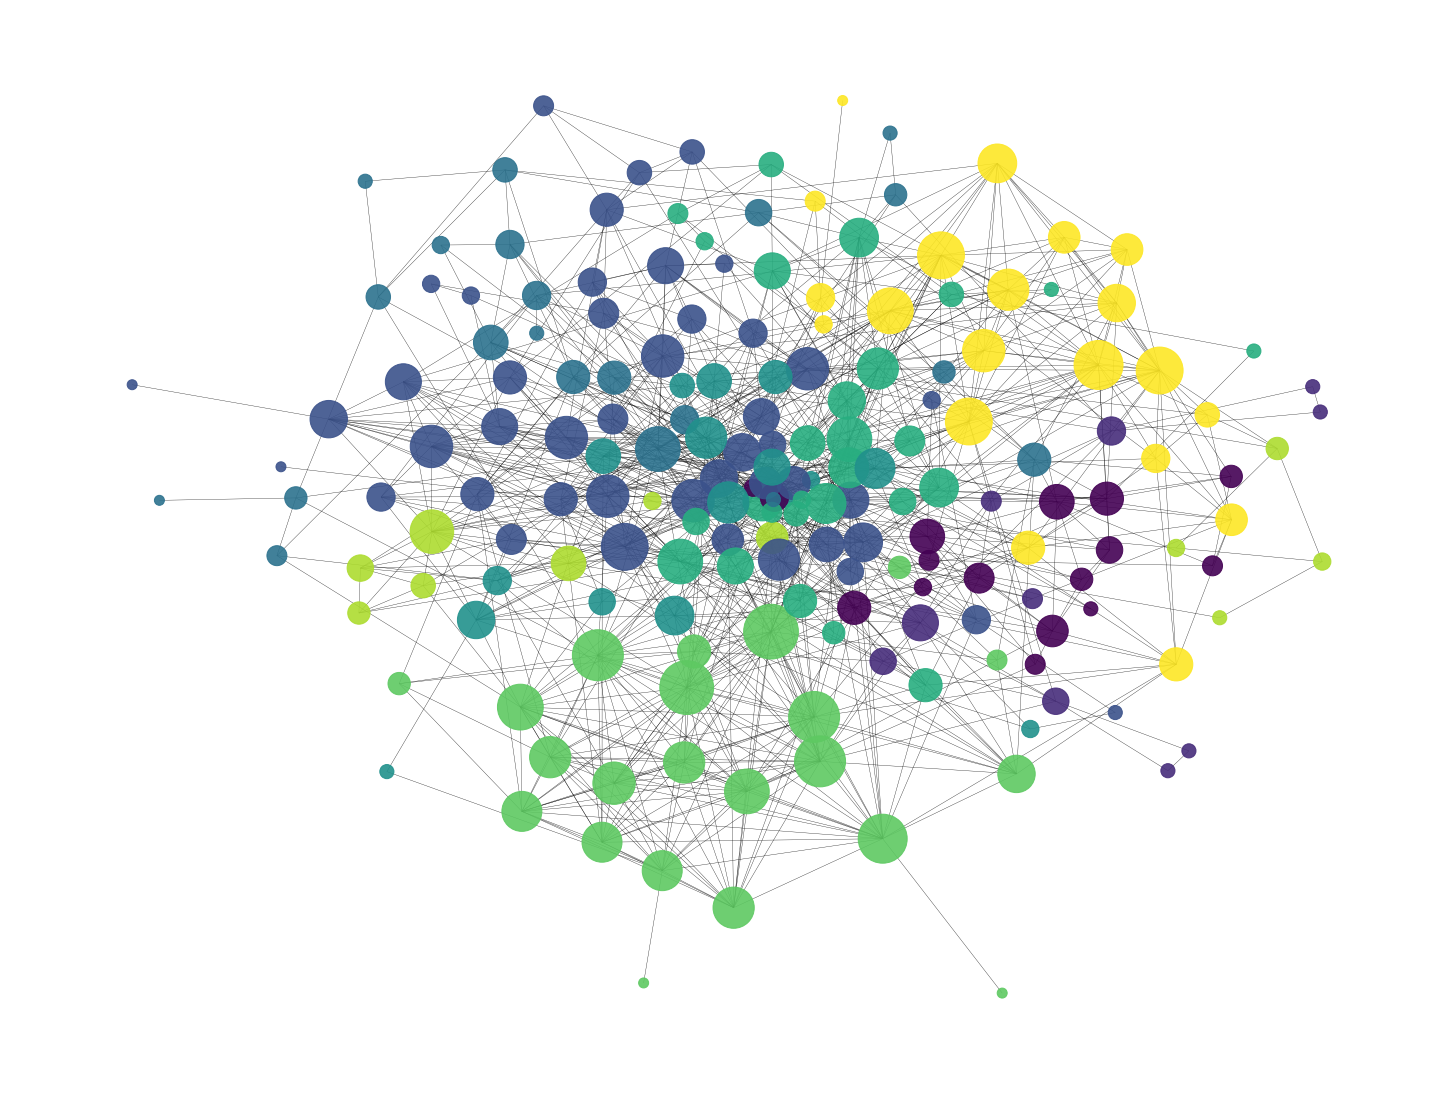

Threshold:  8
- Considering the GCC of the Beatles Network, it has 192 number of nodes and 1233 number of links.
Number of communities found:  8
The modularity value is: 0.368
The distribution of the community sizes


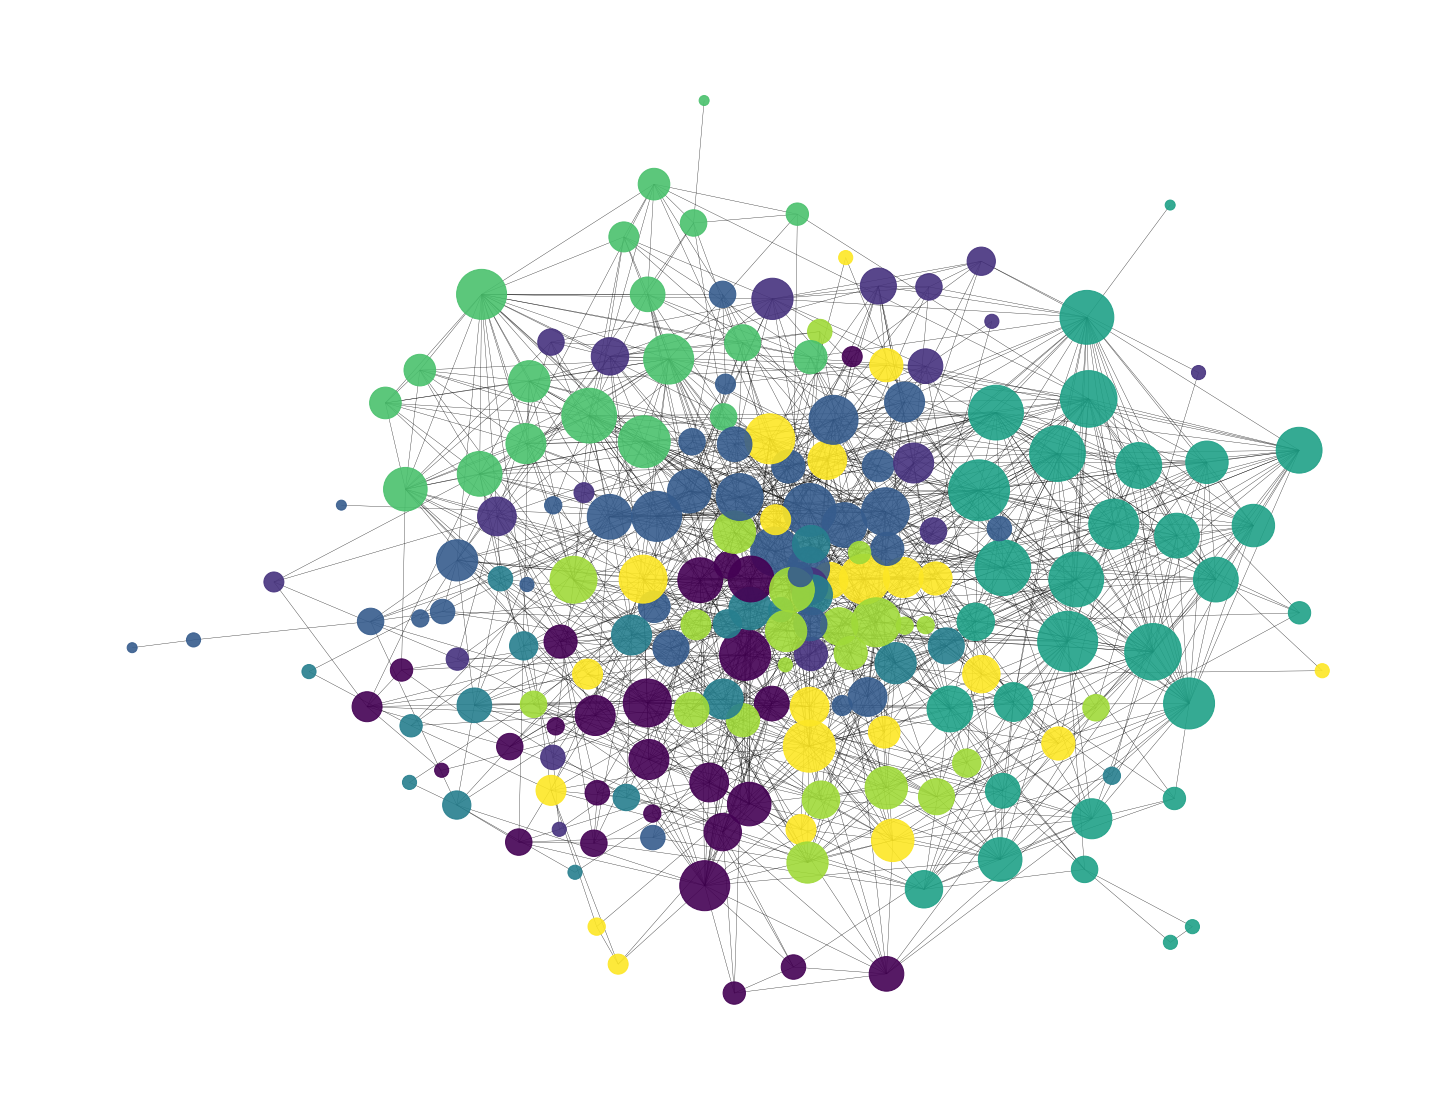

Threshold:  9
- Considering the GCC of the Beatles Network, it has 194 number of nodes and 1515 number of links.
Number of communities found:  6
The modularity value is: 0.319
The distribution of the community sizes


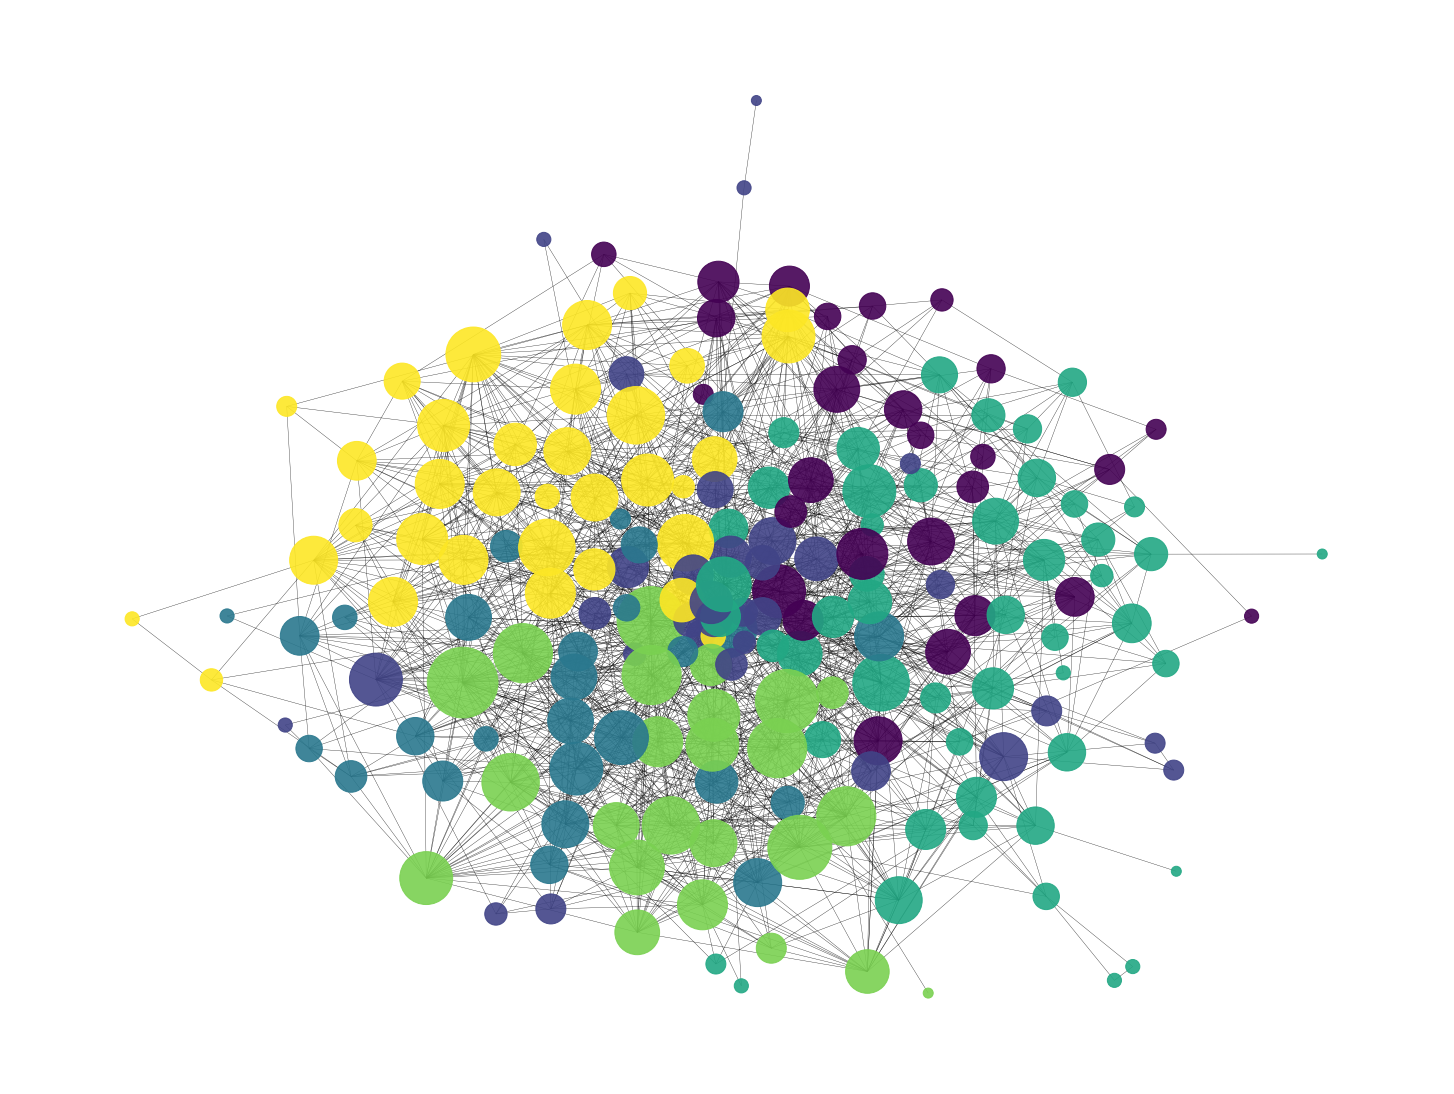

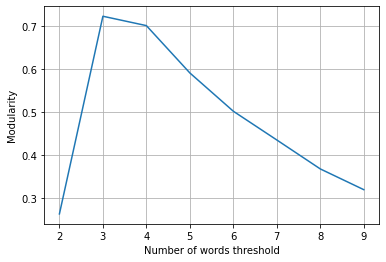

In [132]:
modularities=[]
for i in range(2,10):
    print('Threshold: ',i)
    tc_idf_top={}
    for el in tc_idf_dict:
        tc_idf_top[el]=[word[0] for word in tc_idf_dict[el][-i:]]
    hyperlinks=create_hyperlinks(lyrics_files,tc_idf_top)
    nw=build_network(lyrics_files,hyperlinks)
    GCC=extract_GCC(nw)
    # Compute the best partition. We need to take into account the undirected graph. 
    un_Beatles_nw= GCC.to_undirected()
    partition = community.community_louvain.best_partition(un_Beatles_nw)
    print('Number of communities found: ', len(np.unique(list(partition.values()))))
    mod = community.community_louvain.modularity(partition, un_Beatles_nw)
    print("The modularity value is:","{:.3f}".format(mod))
    modularities.append(mod)
    node_community = [node[1] for node in partition.items()]
    pCol = {i: list(np.random.random(size=3)) for i in set(node_community)}
    plt.figure(figsize=(20, 10))
    forceatlas2 = ForceAtlas2(
                            # Behavior alternatives
                            outboundAttractionDistribution=False,  # Dissuade hubs
                            linLogMode=False,  # NOT IMPLEMENTED
                            adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                            edgeWeightInfluence=2.0,

                            # Performance
                            jitterTolerance=1.0,  # Tolerance
                            barnesHutOptimize=True,
                            barnesHutTheta=1.2,
                            multiThreaded=False,  # NOT IMPLEMENTED

                            # Tuning
                            scalingRatio=0.1,
                            strongGravityMode=False,
                            gravity=10.0,

                            # Log
                            verbose=False)

    positions = forceatlas2.forceatlas2_networkx_layout(un_Beatles_nw, pos=None, iterations=2000)
    f = dict(nx.degree(un_Beatles_nw))
    node_sizes = [v*100 for v in f.values()]
    print("The distribution of the community sizes")
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    fig = plt.gcf()
    nx.draw(un_Beatles_nw, positions, node_size=node_sizes, with_labels=False, width = 0.35, node_color=list(partition.values()), alpha=0.9)
    fig.set_size_inches(20, 15)
    # plt.savefig('fignet'+str(i))
    plt.show()
        
plt.plot(list(range(2,10)),modularities)
plt.xlabel('Number of words threshold')
plt.ylabel('Modularity')
plt.grid()

Let's consider we put the threshold at 5.

**From the graphs and data plotted above, it has been decided to put the threshold at 5 words. Thus, achieving both a high level of modularity and a significant number of links and nodes when considering the GCC.**

In [133]:
tc_idf_top={}
for el in tc_idf_dict:
    tc_idf_top[el]=[word[0] for word in tc_idf_dict[el][-5:]]
hyperlinks=create_hyperlinks(lyrics_files,tc_idf_top)
nw=build_network(lyrics_files,hyperlinks)
GCC=extract_GCC(nw)
# Compute the best partition. We need to take into account the undirected graph. 
un_Beatles_nw= GCC.to_undirected()

- Considering the GCC of the Beatles Network, it has 173 number of nodes and 480 number of links.


In [199]:
Lyrics_Data

Song  Year                             Writer  \
0                        yesterday  1965                   Lennon/McCartney   
1    youve-got-hide-your-love-away  1965                             Lennon   
2              got-get-you-my-life  1966                          McCartney   
3                       i-need-you  1965                           Harrison   
4                    one-after-909  1970                   Lennon/McCartney   
..                             ...   ...                                ...   
191                    ill-get-you  1963                   Lennon/McCartney   
192            if-i-needed-someone  1965                           Harrison   
193                      real-love  1988  Lennon/McCartney/Harrison/Starkey   
194                         misery  1963                   Lennon/McCartney   
195           tell-me-what-you-see  1965                   Lennon/McCartney   

                   Album     LabMT  Community     VADER  \
0    Yesterday_and_Today  5.255484        0.0 -0.002929   
1                  Help!  5.600000        1.0  0.184185   
2               Revolver  5.441333        0.0  0.015378   
3                  Help!  5.351053        2.0  0.037942   
4              Let_It_Be  5.543571        3.0 -0.039484   
..                   ...       ...        ...       ...   
191               Single  5.752353        5.0  0.283187   
192  Yesterday_and_Today  5.887000        4.0  0.198907   
193          Anthology 2  5.830625        5.0  0.246766   
194     Please_Please_Me  4.755161        0.0 -0.274800   
195                Help!  5.570909        8.0  0.035948   

     VADER_without_neutral degree  
0                -0.007114      6  
1                 0.409300     10  
2                 0.088425      7  
3                 0.091060      2  
4                -0.300080      2  
..                     ...    ...  
191               0.399036     17  
192               0.309411      1  
193               0.325282      1  
194              -0.458000      1  
195               0.150980      3  

[196 rows x 9 columns]

### <font color='green'> 3.2 _Visualize the Network:_
    

In [134]:
# Determing node size depending on the degree of each node. 
degree=[el *15 for el in list(dict(GCC.out_degree()).values())]


#Specifying Labels
highest_degree = dict(sorted(GCC.out_degree, key=lambda x: x[1], reverse=True)[0:20])
labels_draw = list(highest_degree.keys())
labels = {}    
for node in GCC.nodes():
    if node in labels_draw:
        labels[node] = node

In [138]:
#Get node positions based on the Force Atlas 2 algorithm 
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.01,#1 before - 0.01 after
                        strongGravityMode=False,#False  before - true after
                        gravity=10, #1.0 before -1.5 after

                        # Log
                        verbose=False) #True before - false after

#getting node positions
positions = forceatlas2.forceatlas2_networkx_layout(GCC, pos=None, iterations=300)

480

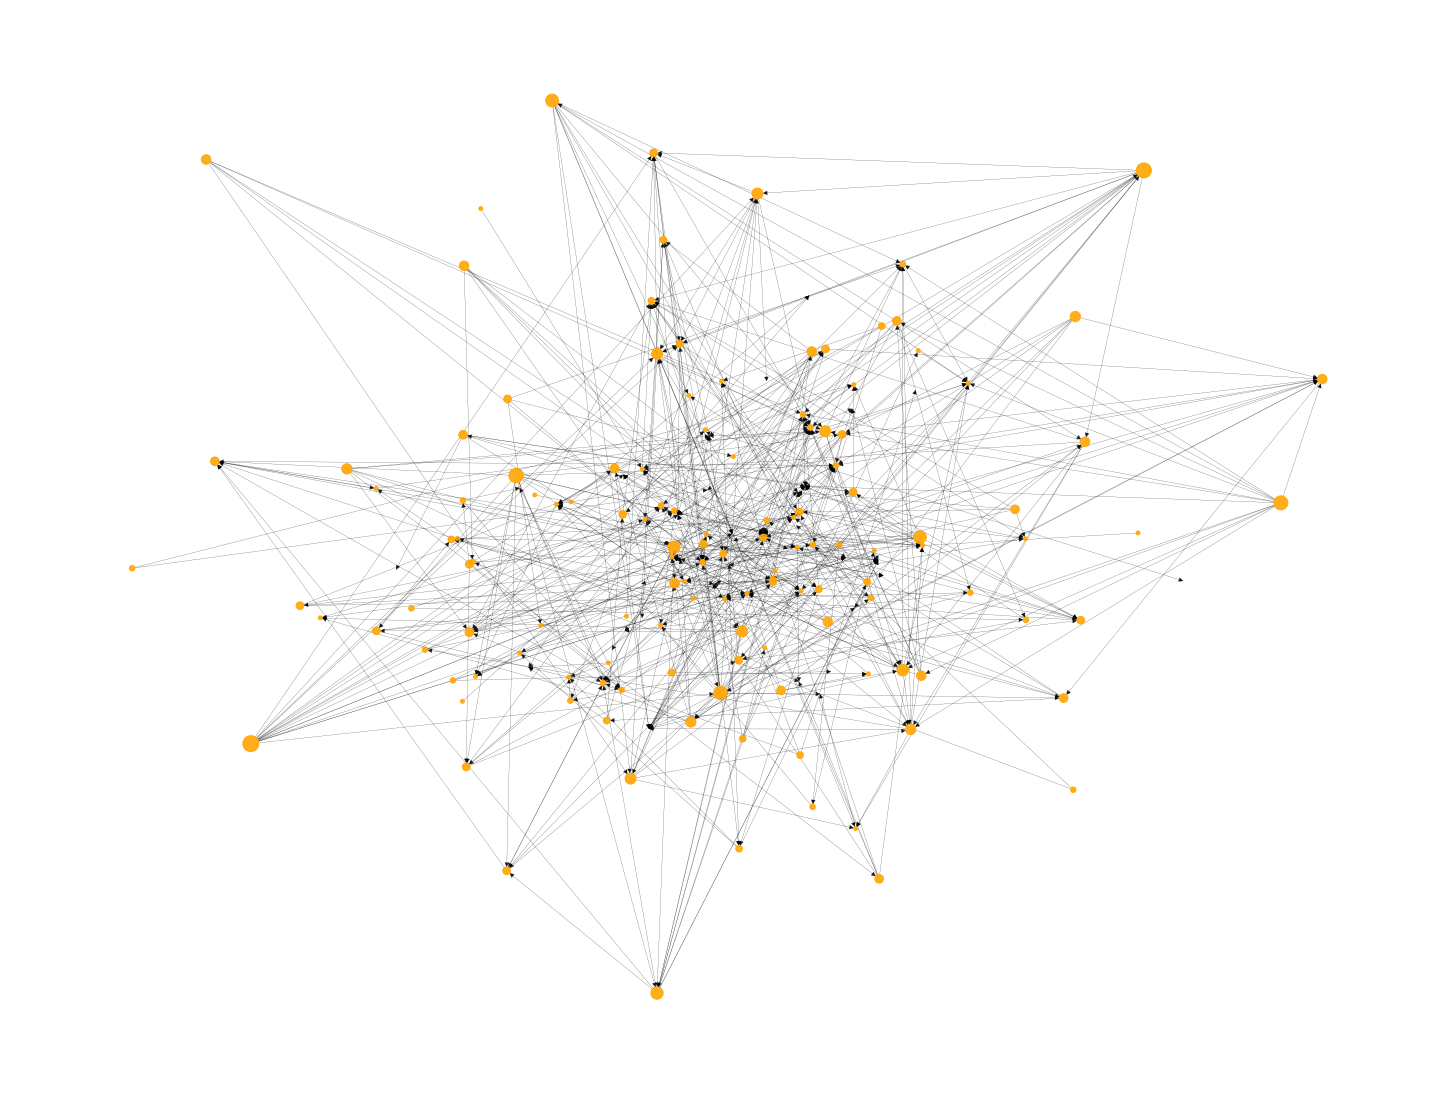

In [136]:
#VISUALIZATION
options = {
    'node_size': degree,
    'width': 0.2,
    #'edge_color':edge_colors,
    'node_color': 'orange',
    #'labels':labels,
    'alpha':0.9
}

fig = plt.gcf()
nx.draw(GCC, positions,**options) 
fig.set_size_inches(20, 15)
plt.savefig("Final_Graph.png")

### <font color='green'> 3.3 _Statistical Analysis of the Network:_
    
- **Degree Distributions:**
First, some basic stats of the network have been computed. Thus, total degree, in-degree and out-degree distributions are plotted below:

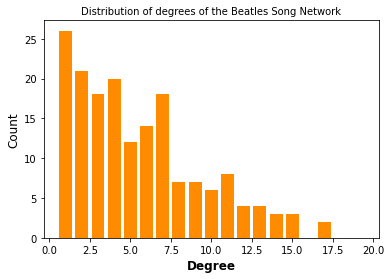

In [139]:
degrees = sorted(GCC.degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
degrees_dist = [tuples[1] for tuples in degrees]
v1 = np.arange(int(min(degrees_dist )),int(max(degrees_dist))+4,1)

fig1 = plt.gcf()
count1,bins1=np.histogram(degrees_dist ,bins=v1)
plt.bar(bins1[:-1], count1,color='darkorange')
plt.title('Distribution of degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('Degree',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12)
plt.show()

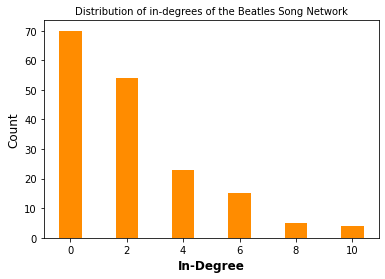

In [140]:
#Bar plot of the in-degree distribution
in_degrees = sorted(GCC.in_degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
in_degrees_dist = [tuples[1] for tuples in in_degrees]
v2 = np.arange(int(min(in_degrees_dist )),int(max(in_degrees_dist)),2)

fig2 = plt.gcf()
count2,bins2=np.histogram(in_degrees_dist ,bins=v2)
plt.bar(bins2[:-1], count2,color='darkorange')
plt.title('Distribution of in-degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12)
plt.show()

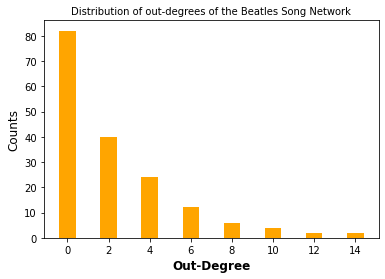

In [141]:
#Bar plot of the out-degree distribution
out_degrees = sorted(GCC.out_degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
out_degrees_dist = [tuples[1] for tuples in out_degrees]

fig3 = plt.gcf()
v3 = np.arange(int(min(out_degrees_dist)),int(max(out_degrees_dist)),2)
count3,bins3=np.histogram(out_degrees_dist,bins=v3)
plt.bar(bins3[:-1], count3,color='orange')
plt.title('Distribution of out-degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('Out-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show()

### <font color='green'> 3.4 _Finding Communities:_

In order to find communities inside the created network _community.community_louvain.best_partition()_ algorithm has been used. Thus the GCC of the beatles networks has been converted to undirected and inserted as an input to this algorithm. The results found show that 9 communities have been found, with a modularity value of 0.595.


Separation between communities might be useful to analyze how songs are related between each other when establishing this linking method, and thus analyze which are the common characteristics and peculiarities of each community. First we started computing which were the most common words used in each community considering both the total number of words and the unique ones. Results are shown in the table below:

In [142]:
# Compute the best partition. We need to take into account the undirected graph. 
un_Beatles_nw= GCC.to_undirected()
while len(np.unique(list(partition.values())))!=9: #to be consistent each time the code is run
    partition = community.community_louvain.best_partition(un_Beatles_nw)

print('Number of communities found: ', len(np.unique(list(partition.values()))))

Number of communities found:  9


In [143]:
mod = community.community_louvain.modularity(partition, un_Beatles_nw)
print("The modularity value is:","{:.3f}".format(mod))

The modularity value is: 0.594


Compute the number of songs in every community.

In [144]:
# We compute the number of songs in every community
#communities_d stores the group of songs in the same community
communities_d=dict.fromkeys(list(range(0,len(np.unique(list(partition.values()))))))
for i in range(0,len(np.unique(list(partition.values())))):
    l=[]
    for el in partition:
        if partition[el]==i:
            l.append(el)
    communities_d[i]=l
    
size_communities=[len(x) for x in communities_d.values()]

size_communities #number of songs in each community

[26, 18, 12, 28, 27, 22, 8, 19, 13]

Let's name every community for the song with highest degree

In [147]:
communities_named={}
for el in communities_d:
    degrees=[un_Beatles_nw.degree(song) for song in communities_d[el]]
    # pick the maximum degree and rename the community by the max degree name
    communities_named[communities_d[el][degrees.index(max(degrees))]]=communities_d[el]

#### <font color='green'> 3.4.1 _Visualize Communities:_

In [148]:
node_community = [node[1] for node in partition.items()]
pCol = {i: list(np.random.random(size=3)) for i in set(node_community)}

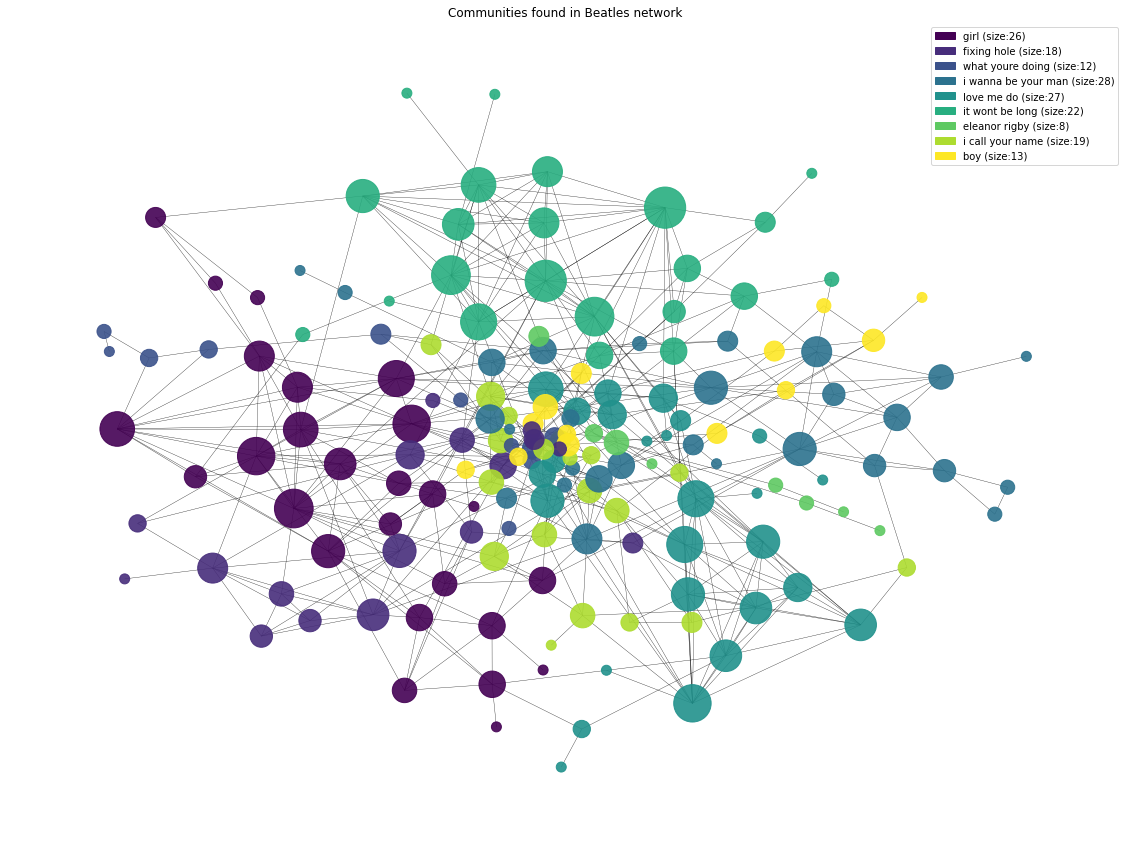

In [149]:
plt.figure(figsize=(30, 15))
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=2.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        # Log
                        verbose=False)

positions = forceatlas2.forceatlas2_networkx_layout(un_Beatles_nw, pos=None, iterations=2000)
f = dict(nx.degree(un_Beatles_nw))
node_sizes = [v*100 for v in f.values()]
plt.title('Communities found in Beatles network')
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
fig = plt.gcf()
nx.draw(un_Beatles_nw, positions, node_size=node_sizes, with_labels=False, width = 0.35, node_color=list(partition.values()), alpha=0.9)
# add legend
legend=[]
for idx,el in enumerate(cmap.colors):
    legend.append(mpatches.Patch(color=cmap.colors[idx], label=list(communities_named)[idx]+' (size:'+str(size_communities[idx])+')'))
plt.legend(handles=legend)
# plt.savefig('Communities_beatles')
fig.set_size_inches(20, 15)

Some first conclusions can be extracted from these communities. Although most of them share some of the most common words, some differences between them can be observed. For example in the community 4, including love me do song, love is the most used word, but ill, mine, true and cant are the other words. In contrast, in community 8, including I want to hold your hand song, although love is also the most used word, the other most common ones are say, know, good and hello. Despite this is not enough to affirm that there exist significant differences between the communities, the general perception about love seems to change, with a more sad-negative perspective in community 4 and a more optimistic-joyful love in the community 8.

On the other hand, if we take a look in the unique words, in other words, in how many songs of the community a word appears, it is observed howthe most common ones are just present in half of the songs of the community, indicating that although there is a sense of belonging in each community, the partition is still far from being well done in terms of separating topics, and usually each community is a mix of different words-moods.

#### <font color='green'> 3.4.2 _Analysis of the Communities:_

<font color='darkblue'> We extract the **most common words** in each community. 
    
    
- <font color='darkblue'> First, counting the number of times a word appears in each song of the community. 

In [150]:
cell_text=[]
for idx in communities_named:
    community_words=[]
    for el in communities_named[idx]:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        for word in clean:
            community_words.append(word)
    cell_text.append(FreqDist(community_words).most_common(5))
    print(idx,': ', FreqDist(community_words).most_common(5))

girl :  [('girl', 95), ('little', 63), ('come', 54), ('see', 41), ('love', 39)]
fixing hole :  [('better', 52), ('way', 49), ('home', 41), ('hey', 32), ('going', 29)]
what youre doing :  [('say', 57), ('love', 44), ('hello', 35), ('know', 29), ('word', 25)]
i wanna be your man :  [('baby', 78), ('love', 66), ('know', 58), ('man', 46), ('said', 45)]
love me do :  [('love', 145), ('ill', 58), ('honey', 32), ('true', 28), ('well', 26)]
it wont be long :  [('yeah', 170), ('long', 60), ('know', 39), ('sie', 24), ('love', 23)]
eleanor rigby :  [('know', 74), ('name', 36), ('lonely', 28), ('look', 27), ('number', 20)]
i call your name :  [('mine', 44), ('good', 35), ('night', 32), ('know', 28), ('sun', 27)]
boy :  [('back', 39), ('tell', 32), ('goes', 26), ('get', 22), ('heart', 21)]


- <font color='darkblue'> Second, counting in how many songs of the community a word appear.  Below, a function is created for that purpose. 

In [151]:
cell_text=[]
for idx in communities_d:
    community_words=[]
    for el in communities_d[idx]:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    cell_text.append(FreqDist(community_words).most_common(5))
    # print('size:' ,size_communities[idx])
    print(list(communities_named.keys())[idx], ':',FreqDist(community_words).most_common(5))
    
# pd.DataFrame(cell_text): just to create the tables for the markdown

girl : [('know', 13), ('love', 13), ('see', 12), ('girl', 11), ('time', 9)]
fixing hole : [('got', 8), ('way', 8), ('time', 8), ('say', 7), ('see', 7)]
what youre doing : [('know', 9), ('love', 9), ('like', 4), ('need', 4), ('see', 4)]
i wanna be your man : [('know', 13), ('love', 11), ('like', 10), ('man', 9), ('see', 9)]
love me do : [('love', 17), ('ill', 11), ('like', 10), ('know', 8), ('want', 7)]
it wont be long : [('know', 12), ('yeah', 12), ('day', 8), ('long', 8), ('well', 7)]
eleanor rigby : [('one', 5), ('know', 5), ('going', 3), ('time', 3), ('window', 3)]
i call your name : [('know', 9), ('love', 7), ('see', 7), ('ive', 6), ('never', 6)]
boy : [('back', 8), ('time', 6), ('away', 6), ('ill', 6), ('get', 5)]


In [152]:
def community_words(community):
    community_words=[]
    for el in community:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    return FreqDist(community_words).most_common(5)

community_words(communities_d[0])

[('know', 13), ('love', 13), ('see', 12), ('girl', 11), ('time', 9)]

<font color='darkblue'> We were also interested in analyzing **in which community** the most famous songs belong.

In [156]:
def song_community(song):
    i=0
    for idx in communities_d:
        if song in communities_d[i]:
            return i
        i+=1
        
print(list(communities_named.keys())[song_community('yesterday')])
community_words(communities_d[song_community('yesterday')])

girl


[('know', 13), ('love', 13), ('see', 12), ('girl', 11), ('time', 9)]

|                             | Most common words (total number) |              |              |              |              | Most common unique words |            |            |             |             | Size of the community |
|-----------------------------|:--------------------------------:|--------------|--------------|--------------|--------------|:------------------------:|------------|------------|-------------|-------------|-----------------------|
| Comunity                    |                                  |              |              |              |              |                          |            |            |             |             |                       |
|             0: little child |                       (come, 51) |   (know, 40) |  (honey, 32) |    (got, 31) | (things, 26) |               (know, 10) |  (love, 9) |  (like, 9) |    (say, 8) |    (got, 8) |                    21 |
|                     1: girl |                       (girl, 93) | (better, 60) |    (let, 54) | (little, 53) |   (love, 48) |                (see, 12) | (love, 11) | (know, 11) |  (time, 11) |  (girl, 10) |                    26 |
|                2: two of us |                        (way, 39) |   (home, 34) |    (two, 11) |    (work, 9) |    (back, 9) |                 (way, 3) |   (got, 2) |  (long, 2) | (sunday, 2) | (ticket, 2) |                     4 |
|      3: i wanna be your man |                       (baby, 78) |   (know, 51) |    (man, 43) |   (said, 42) |   (want, 40) |               (know, 10) |  (baby, 8) |   (see, 8) |   (want, 8) |   (said, 7) |                    21 |
|               4: love me do |                      (love, 156) |    (ill, 58) |   (mine, 46) |   (true, 27) |   (cant, 25) |               (love, 18) |  (ill, 11) | (know, 10) |    (see, 9) |   (want, 8) |                    30 |
|         5: it won't be long |                      (yeah, 170) |   (long, 60) |   (know, 39) |    (sie, 24) |   (love, 23) |               (know, 12) | (yeah, 12) |   (day, 8) |   (long, 8) |   (well, 7) |                    22 |
|            6: eleanor rigby |                       (know, 74) |   (name, 36) | (lonely, 28) |   (look, 27) | (number, 20) |                 (one, 5) |  (know, 5) | (going, 3) |   (time, 3) | (window, 3) |                     8 |
|                     7: boys |                       (back, 39) |   (tell, 32) |   (goes, 26) |    (get, 22) |  (heart, 21) |                (back, 8) |  (time, 6) |  (away, 6) |    (ill, 6) |    (get, 5) |                    13 |
| 8: i want to hold your hand |                       (love, 78) |    (say, 72) |   (know, 51) |   (good, 37) |  (hello, 35) |               (know, 17) | (love, 17) |  (say, 10) |   (like, 8) |   (time, 8) |                    29 |
|                             |                                  |              |              |              |              |                          |            |            |             |             |                       |

Summarizing results: For each Commuity we aim to also analyze:
- Total number of songs
- Average number of words per song
- Average number of unique words per song
- Average number of unique words per song/total number of words per song
- Average of number of letter per word per song (Simple or complex vocabulary)
- Average LabMT values per song
- Average VADER values per song
- Average number of degrees per song
- Most common words

To compute most of these attributes the following function is defined:

In [157]:
def word_analysis(song):
    clean=clean_lyrics('lyrics_songs/'+song.replace(' ','-')+'.txt')
    # number of words per song
    num_words=len(clean)
    # Average number of unique words per song
    num_unique=len(np.unique(clean))
    # Average number of unique words per song/total number of words per song
    percentage_unique=len(np.unique(clean))/len(clean)
    # Average of number of letter per word per song (Simple or complex vocabulary)
    average_length=np.mean([len(word) for word in clean])
    
    return num_words,num_unique,percentage_unique,average_length

###### <font color='green'> 3.4.2.1 _Sentimental Analysis within communities: LabMT_

As aimed in the scope we want to include the Sentimental Analysis according to both LabMT and VADER criteria. In order to achieve so, below we have first defined a function that computes the average LabMT value per song. To achieve so, first the labMIT.csv is imported and the average happiness score for each word is saved in a dictionnary. Then a function is defined in which the song (input) is readed from lyrics songs folder and cleaned by applying clean_lyrics() function. Then the average score for each word of the cleaned file is stored and the mean is computed and returned.

In [159]:
# %matplotlib auto
labMT = pd.read_csv('labMIT.csv',sep=';')
wordsLabMT = {}
for word,score in zip(labMT['word'],labMT['happiness_average']):
    wordsLabMT[word]=score
    
def analysis_labMT_cleaned_song(song):
    '''To compute the sentimental analysis by using labMT we need to lemmatize, 
    set to lower case and tokenize the words so they will not used be twice. 
    In clean lyrics, this process has already been implemented.'''
    cleaned=clean_lyrics('lyrics_songs/'+song+'.txt')
    words=list(set(cleaned).intersection(list(wordsLabMT.keys())))
    score=np.mean([wordsLabMT[word] for word in words])
    return score

###### <font color='green'> 3.4.2.2 _Sentimental Analysis within communities:: VADER_

However, sometimes maybe an analysis with VADER makes more sense, due to the mood of the songs usually resides in how the sentence is written and not just in single words. 

So same procedure has been done but now computing the average sentimental value of each song according to VADER criteria. Due to a lot of neutral sentences were observed, a second function has also been defined. The first one considers and computes the mean of all sentences, and therefore the results obtained is more robust. In order to observe more variation between the different songs, the second function just considers these sentences that differ from a netural value when computing the VADER. 

In [160]:
analyzer = SentimentIntensityAnalyzer()

# function to compute the VADER score of a single sentence
def sentiment_score_VADER(sentence):
    sentiment_dict = analyzer.polarity_scores(sentence)
    return sentiment_dict['compound']

# function to compute the average VADER of a song (cleaning the lyrics)
def analysis_VADER_cleaned_song(song):
    song=open('lyrics_songs/'+song+'.txt').read()
    index=[(m.start(0), m.end(0)) for m in re.finditer('  ', song)]
    sentences=[]
    i=0
    for el in index:
        sentences.append(song[i:el[0]])
        i=el[1]
    return np.mean([sentiment_score_VADER(el) for el in sentences])

In [161]:
def analysis_VADER_without_neutral_sentences(song):
    song=open('lyrics_songs/'+song+'.txt').read()
    index=[(m.start(0), m.end(0)) for m in re.finditer('  ', song)]
    sentences=[]
    i=0
    for el in index:
        sentences.append(song[i:el[0]])
        i=el[1]
    vader_values=[]
    for el in sentences:
        v=sentiment_score_VADER(el)
        if v!=0:
            vader_values.append(v)
    if len(vader_values)==0:
        return 0
    else:
        return np.mean(vader_values)

In [167]:
# function to return key for any value
def get_key(val):
    for key, value in communities_d.items():
        if val in value:
            return int(key)

# if get key is None means that the song does not belong to the GCC, and therefore to any community

In [204]:
Song_data=pd.read_csv('AllAllAtributes.txt')
Song_data['Song']=[clean_title(title).replace('_','-') for title in Song_data['Song']]
Lyrics_Data=pd.DataFrame({'Song':lyrics_files})
Lyrics_Data['Year']=[Song_data[Song_data['Song']==title]['Year'].values[0] for title in Lyrics_Data['Song']]
Lyrics_Data['Writer']=[Song_data[Song_data['Song']==title]['Writer'].values[0] for title in Lyrics_Data['Song']]
Lyrics_Data['Album']=[Song_data[Song_data['Song']==title]['Album'].values[0] for title in Lyrics_Data['Song']]
Lyrics_Data['LabMT']=[analysis_labMT_cleaned_song(title) for title in Lyrics_Data['Song']]
Lyrics_Data['Community']=[get_key(title.replace('-',' ')) for title in Lyrics_Data['Song']]
Lyrics_Data['VADER']=[analysis_VADER_cleaned_song(title.replace(' ','-')) for title in Lyrics_Data['Song']]
Lyrics_Data['VADER_without_neutral']=[analysis_VADER_without_neutral_sentences(title.replace(' ','-')) for title in Lyrics_Data['Song']]
Lyrics_Data['degree']=[GCC.degree(song.replace('-',' ')) for song in Lyrics_Data['Song']]

In [212]:
# just consider the ones that belong to the GCC and thus to a Community
Lyrics_Data.dropna(subset=['Community'],inplace=True)
Lyrics_Data.head()

Song  Year            Writer                Album  \
0                      yesterday  1965  Lennon/McCartney  Yesterday_and_Today   
1  youve-got-hide-your-love-away  1965            Lennon                Help!   
2            got-get-you-my-life  1966         McCartney             Revolver   
3                     i-need-you  1965          Harrison                Help!   
4                  one-after-909  1970  Lennon/McCartney            Let_It_Be   

      LabMT  Community     VADER  VADER_without_neutral degree  
0  5.255484        0.0 -0.002929              -0.007114      6  
1  5.600000        1.0  0.184185               0.409300     10  
2  5.441333        0.0  0.015378               0.088425      7  
3  5.351053        2.0  0.037942               0.091060      2  
4  5.543571        3.0 -0.039484              -0.300080      2

Finally, after all the functions have been defined we proceed to create a DataFrame in order to better visualize all the results of the analysis performed.

In [213]:
communities_df=[]
for comm in np.unique(Lyrics_Data['Community']):
    df=Lyrics_Data[Lyrics_Data['Community']==comm]
    num_songs=len(df)
    words_df=pd.DataFrame([word_analysis(song.replace('-',' ')) for song in df['Song']])
    [num_words,num_unique,percentage_unique,average_length]=np.round(np.mean(words_df),2)
    labMT=np.mean([analysis_labMT_cleaned_song(song.replace(' ','-')) for song in df['Song']])
    VADER=np.mean([analysis_VADER_without_neutral_sentences(song.replace(' ','-')) for song in df['Song']])
    degree=np.mean([int(df[df['Song']==song]['degree']) for song in df['Song']])
    comm_words=[el[0] for el in community_words(communities_d[comm])]
    communities_df.append([num_songs,num_words,num_unique,percentage_unique,average_length,labMT,
                           VADER,degree,comm_words])

In [214]:
communities=pd.DataFrame(communities_df)
# We rename all the different columns
communities=communities.rename(columns={0:"num_songs",1:"num_words",2:"num_unique",3:"percentage_unique",
                                        4:"average_length",5:"average labMT",6:"average VADER",
                                        7:"average degree",8:"common words"})
communities=communities.round(2)
communities

num_songs  num_words  num_unique  percentage_unique  average_length  \
0         26      79.12       35.58               0.46            4.77   
1         18      90.28       41.00               0.48            4.78   
2         12      73.58       33.75               0.48            4.90   
3         28      86.50       34.54               0.43            4.78   
4         27      64.74       28.15               0.46            4.70   
5         22      77.14       36.09               0.50            4.85   
6          8      93.00       38.38               0.45            5.12   
7         19      69.84       30.74               0.47            4.95   
8         13      79.62       36.46               0.49            4.58   

   average labMT  average VADER  average degree  \
0           5.62           0.15            7.42   
1           5.62           0.14            5.22   
2           5.59           0.19            2.58   
3           5.62           0.17            4.82   
4           5.85           0.34            6.70   
5           5.59           0.22            7.86   
6           5.71           0.15            2.50   
7           5.72           0.37            4.53   
8           5.50           0.13            3.62   

                       common words  
0     [know, love, see, girl, time]  
1        [got, way, time, say, see]  
2     [know, love, like, need, see]  
3      [know, love, like, man, see]  
4     [love, ill, like, know, want]  
5     [know, yeah, day, long, well]  
6  [one, know, going, time, window]  
7     [know, love, see, ive, never]  
8      [back, time, away, ill, get]

Finally, an interactive pie chart is made in order to visualizes how many degrees in total has every community, and which is the proportion with respect to the total. 

In [218]:
fig = px.pie(Lyrics_Data, values='degree', names='Community', title='Degrees per community')
fig.show()

To add the interactive plot in the website the following steps are required. Basically we need a username and an api key to upload the figure in chart studio. From there is where we will call the graph to be included in the website.

In [ ]:
username = 'llucoco' # your username
api_key = 'zBqWIM1hxh393OGjtzlA' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
# py.plot(fig, filename = 'degrees-per-community', auto_open=True)
# pio.write_html(fig, file='index.html', auto_open=True)
# tls.get_embed('https://plotly.com/~llucoco/3/') #change to your url

## <font color='green'> 3.5 _Evolution of sentimental analysis per year_

In order to have a first visualization of the results a scatter plot was aimed, where the x-axis corresponded to the year and the y-axis to the mean labMT value per song. Moreover, each community would be represented with a specific colour. In order to achieve so, a dataframe was created, including the name of each song, the year, the labMT average value and the community it belonged to. Only songs that are in the GCC and in the Beatles Golden decade (1962-1970) have been included.

Below, the results obtained with the labMT analysis can be observed (note that communities 2, 5 and 8 are not represented in this graph, meaning that when filtering by Year they have been taken out of the scope)

We aim to do a scatter plot now where the x-axis will correspond to the year, and the y-axis to the mean labMT value. Also each community will be represented with a specific colour. To achieve data we need a dataframe with the name of the song, the year, the labMT value and the community it belongs to.

Let's merge the different Writers in 5 categories: Harrison, Lennon, Mc Cartney, Lennon and Mc Cartney, and others.

In [221]:
Lyrics_Data['Writer'].replace({'George Harrison': 'Harrison',
                               'Lennon and McCartney/Nicolas/Montague': 'Lennon / McCartney',
                               'Lennon, with McCartney':'Lennon / McCartney',
                               'Lennon/McCartney/Harrison/Starkey': 'Lennon / McCartney',
                               'Lennon/McCartney/Nicolas/Hellmer':'Lennon / McCartney',
                               'McCartney, with Lennon':'Lennon / McCartney',
                               'McCartney/Lennon':'Lennon / McCartney',
                               'Lennon/McCartney':'Lennon / McCartney',
                               'McCartney/Harrison':'McCartney',
                               'Perkins/Jefferson':'Not found',
                              }, inplace=True)

We will just focus on the songs realeased on Beatles golden decade.

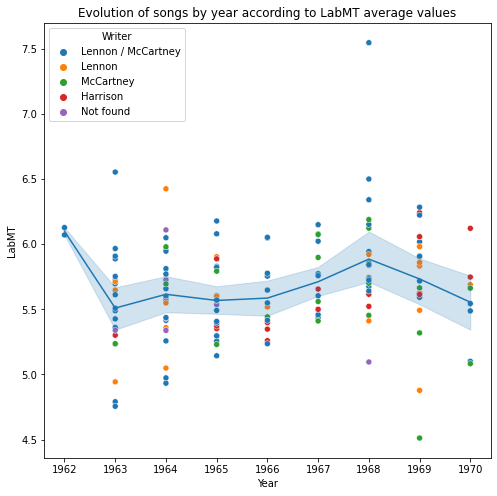

In [223]:
Lyrics_Data_Golden_Decade=Lyrics_Data[Lyrics_Data['Year']<1975]
plt.figure(figsize=(8, 8))
sns.scatterplot(data=Lyrics_Data_Golden_Decade, x="Year", y="LabMT",hue="Writer")
sns.lineplot(data=Lyrics_Data_Golden_Decade, x="Year", y="LabMT") # show mean and 95% confidence interval
plt.legend(title='Writer')
plt.title('Evolution of songs by year according to LabMT average values')
# plt.savefig('LabMT evolution')
plt.show()

It can be seen how there is not a clear tendency in the general mood of beatles songs as years pass by. According to LabMT analysis it could be said that Beatles songs tend to slightly increase its positivy as years go by, reaching its maximun average value at year 1968. From there, their positivity slightly decreases the last two years of this golden decade before their break-up at 1970.

In [224]:
Lyrics_Data['VADER']=[analysis_VADER_cleaned_song(title.replace(' ','-')) for title in Lyrics_Data['Song']]
Lyrics_Data['VADER_without_neutral']=[analysis_VADER_without_neutral_sentences(title.replace(' ','-')) for title in Lyrics_Data['Song']]
Lyrics_Data_Golden_Decade=Lyrics_Data[Lyrics_Data['Year']<1975]
Lyrics_Data_Golden_Decade.head()

Song  Year              Writer  \
0                      yesterday  1965  Lennon / McCartney   
1  youve-got-hide-your-love-away  1965              Lennon   
2            got-get-you-my-life  1966           McCartney   
3                     i-need-you  1965            Harrison   
4                  one-after-909  1970  Lennon / McCartney   

                 Album     LabMT  Community     VADER  VADER_without_neutral  \
0  Yesterday_and_Today  5.255484        0.0 -0.002929              -0.007114   
1                Help!  5.600000        1.0  0.184185               0.409300   
2             Revolver  5.441333        0.0  0.015378               0.088425   
3                Help!  5.351053        2.0  0.037942               0.091060   
4            Let_It_Be  5.543571        3.0 -0.039484              -0.300080   

  degree  
0      6  
1     10  
2      7  
3      2  
4      2

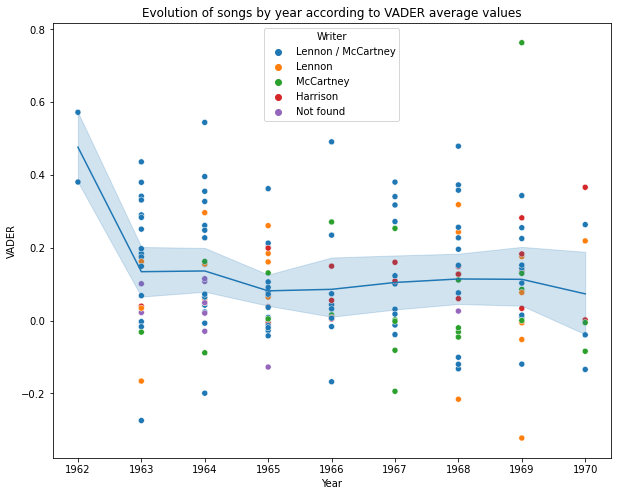

In [228]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Lyrics_Data_Golden_Decade, x="Year", y="VADER",hue="Writer")
sns.lineplot(data=Lyrics_Data_Golden_Decade, x="Year", y="VADER") # show mean and 95% confidence interval
plt.legend(title='Writer')
plt.title('Evolution of songs by year according to VADER average values')
# plt.savefig('VADER evolution')
plt.show()

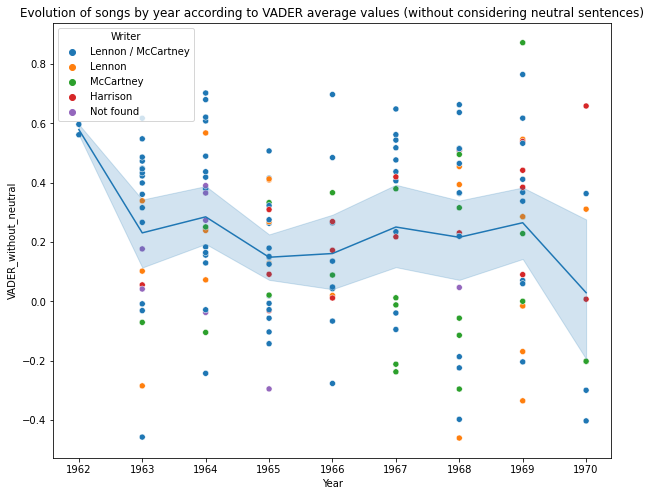

In [229]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Lyrics_Data_Golden_Decade, x="Year", y="VADER_without_neutral",hue="Writer")
sns.lineplot(data=Lyrics_Data_Golden_Decade, x="Year", y="VADER_without_neutral") # show mean and 95% confidence interval
plt.legend(title='Writer')
plt.title('Evolution of songs by year according to VADER average values (without considering neutral sentences)')
plt.savefig('VADER_without_neutral_evolution')
plt.show()

From the first graph, less conclusions can be extracted, just that the mood slightly decreases by year, due to it is mainly constant around an average VADER value around 0.1, which means that beatles songs tended to be more positive than negative at least. However, if a look is taken in the second graphs, some more interesting observations can be made. It still can be observed how the positivity of beatles slightly decrease during the first years of the decade, reaching an average VADER value of 0.2 between 1965-1966. From there, VADER average values slightly increases reaching a maximum around 1968-1969 before doing a significant decrease on 1970, the year of their break-up.
Although LabMT and VADER graphs differ when showing the sentimental analysis of beatles songs by year, there a thing that can be observed in both graphs, and its this significant decrease in positivity in last year. Of course it is true that is not enough at all to affirm that, but this gives space for our imagination. Is this increase in negativity related with the fact that their break-up was just around the corner? Could the break-up of the beatles have been predicted and therefore tried to be avoided if sentimental analysis had been implemented and this decrease in positivity had been detected before it was too late?

### <font color='green'> 3.7 _Sentimental Analysis by SongWriter:_

In [230]:
for el in np.unique(Lyrics_Data['Writer']):
    print(el)

Harrison
Lennon
Lennon / McCartney
McCartney
Not found


For each Writer we will analyze:
- Total number of songs
- Average number of words per song
- Average number of unique words per song
- Average number of unique words per song/total number of words per song
- Average of number of letter per word per song (Simple or complex vocabulary)
- Average LabMT values per song
- Average VADER values per song
- Average number of degrees per song

In [232]:
writers_df=[]
for writer in np.unique(Lyrics_Data['Writer']):
    df=Lyrics_Data[Lyrics_Data['Writer']==writer]
    num_songs=len(df)
    words_df=pd.DataFrame([word_analysis(song) for song in df['Song']])
    [num_words,num_unique,percentage_unique,average_length]=np.round(np.mean(words_df),2)
    labMT=np.mean([analysis_labMT_cleaned_song(song.replace(' ','-')) for song in df['Song']])
    VADER=np.mean([analysis_VADER_without_neutral_sentences(song.replace(' ','-')) for song in df['Song']])
    degree=np.mean([int(df[df['Song']==song]['degree']) for song in df['Song']])
    writers_df.append([num_songs,num_words,num_unique,percentage_unique,average_length,labMT,VADER,degree])

In [233]:
writer=pd.DataFrame(writers_df)
writer=writer.rename(index={0: "Harrison", 1: "Lennon", 2: "Lennon / McCartney",3:"McCartney",4:"Not found"})
writer=writer.rename(columns={0:"num_songs",1:"num_words",2:"num_unique",3:"percentage_unique",4:"average_length",
                       5:"average labMT",6:"average VADER",7:"average degree"})
writer=writer.round(2)
writer

num_songs  num_words  num_unique  percentage_unique  \
Harrison                   20      70.30       35.50               0.52   
Lennon                     24      77.38       35.25               0.46   
Lennon / McCartney         90      80.02       34.24               0.46   
McCartney                  29      80.66       34.72               0.46   
Not found                  10      73.40       30.90               0.47   

                    average_length  average labMT  average VADER  \
Harrison                      4.83           5.62           0.26   
Lennon                        4.74           5.61           0.13   
Lennon / McCartney            4.81           5.71           0.27   
McCartney                     4.84           5.60           0.12   
Not found                     4.77           5.53           0.15   

                    average degree  
Harrison                      4.80  
Lennon                        5.29  
Lennon / McCartney            5.93  
McCartney                     5.62  
Not found                     4.00

From the table above, certain things can be concluded. Step by step, from the information extracted, most of the songs authorship correspond to Lennon and McCartney, which were clearly the main influences in terms of composing in the Beatles golden decade. With respect to the average number of words used per song, Harrison was the one that wrote shorter songs. However, when we compute which percentage of the total words used was unique, Harrison has the highest value. Meaning that although writing shorter songs he had slighlty a higher lexical vocabulary. We must keep in mind that this analysis is performed without considering stop words, which makes all these percentages higher. In terms of average length per word used, results show that it is almost the same in all writers, being to a small extent Lennon alone the one that wrote shorter words.

The most interesting part comes when analyzing the sentimental analysis for each writer. According to both labMT and VADER, Lennon and McCartney together were the ones that wrote more postive songs. In contrast, when writing alone their songs were more pessimistic and unenthusiastic. 

Finally, with respect to the average degree, Lennon/McCartney have the highest value, which indicate that apart from having written a lot of songs, their topics are the most connected with others.


In order to facilitate the comprehension of this last attribute, two interactive pie chart using plotly have been made  to compare how the proportions of degrees per writer change when compared with the number of songs per writer.

In [235]:
fig= px.pie(Lyrics_Data_Golden_Decade, values='degree', names='Writer', title='Degrees per writer')
fig.show()

In [236]:
# py.plot(fig, filename = 'degrees-writer', auto_open=True)
# pio.write_html(fig, file='degreeswriter.html', auto_open=True)

In [237]:
#tls.get_embed('https://plotly.com/~llucoco/9/') #change to your url

In [238]:
fig = px.pie(writer, values='num_songs', names=writer.index, title='Number of songs per writer')
fig.show()

In [239]:
#py.plot(fig, filename = 'number-songs-writer', auto_open=True)
#pio.write_html(fig, file='songswriter.html', auto_open=True)

In [240]:
#tls.get_embed('https://plotly.com/~llucoco/11/') #change to your url

From the two pie charts above, it can be concluded that although the total number of songs written per Lennon and McCartney is close to 50%, when computing the total number of degrees that come from their songs, their influence is close to 60%, meaning that their topics were the most common and related ones in all the beatles network of songs.

### <font color='green'> 3.8 _Analysis of the most recurrent topics over time:_

Next step, has been to analyze which were the most recurrent topics over time. Due to there is a huge number of songs written is hard to extract a lot of conclusions when analizing the average LabMT and VADER per year. Thus, the next aim is to find which are the most common words used per year, and from there analyze which was the mood and the main worries this year.

In [241]:
def top5_song(song):
    return FreqDist(clean_lyrics('lyrics_songs/'+song.replace(' ','-')+'.txt')).most_common(5)

def common_words(songs_list):
    total_words=[]
    for el in songs_list:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        # unique=list(np.unique(clean))
        for word in clean:
            total_words.append(word)
    return FreqDist(total_words).most_common(5)

common_words(list(Lyrics_Data[Lyrics_Data['Year']==1962]['Song']))

[('love', 36), ('ill', 8), ('always', 6), ('know', 4), ('true', 3)]

We save the 5 most common words per year in a dataframe, in order to facilitate the visualization then.

In [242]:
d=[]
for year in range(1962,1971):
    for el in common_words(list(Lyrics_Data[Lyrics_Data['Year']==year]['Song'])):
        d.append([el[0],year,el[1]])
comm_words_df=pd.DataFrame(d)
comm_words_df=comm_words_df.rename(columns={0:'Word',1: "Year", 2: "Freq"})

Now we aim to save the average labMT value of the songs that include each specific word per year, to add an extra value on the visualization step.

In [243]:
labMT_values=[]
for year in range(1962,1971):
    for word in list(comm_words_df[comm_words_df['Year']==year]['Word']):
        avg_labMT=[]
        for song in list(Lyrics_Data[Lyrics_Data['Year']==year]['Song']):
            if word in [el[0] for el in top5_song(song)]:
                avg_labMT.append(analysis_labMT_cleaned_song(song.replace(' ','-')))
        labMT_values.append(np.mean(avg_labMT))
comm_words_df['labMT value']=np.round(labMT_values,2)
comm_words_df.head()

Word  Year  Freq  labMT value
0    love  1962    36         6.10
1     ill  1962     8         6.10
2  always  1962     6         6.13
3    know  1962     4         6.13
4    true  1962     3         6.13

Plot of freq of the 5 most common words per year by showing the label.

In [245]:
fig = px.scatter(comm_words_df, x="Year", y="Freq", color="Word",size='labMT value',size_max=5)
fig.show()

In [246]:
#py.plot(fig, filename = 'comm-words-per-year', auto_open=True)
#pio.write_html(fig, file='commwords.html', auto_open=True)

In [247]:
#tls.get_embed('https://plotly.com/~llucoco/5/') #change to your url

From the interactive graph a lot of conclusions can be extracted, referring to the sentimental analysis of beatles songs.

#### <font color='green'> 3.8.1 _Analysis of the most common topics over time per artist:_


In [248]:
comm_words_author=[]
authors=[]
for year in range(1962,1971):
    df=Lyrics_Data[Lyrics_Data['Year']==year]
    comm_words_year=[]
    author_year=[]
    for writer in np.unique(Lyrics_Data['Writer'])[0:4]:
        df2=df[df['Writer']==writer]
        try:
            comm_words_year.append(common_words(list(df2['Song']))[0])
            author_year.append(writer)
        except:
            pass
    comm_words_author.append(comm_words_year)
    authors.append(author_year)

In [249]:
comm_words_author

[[('love', 36)],
 [('bother', 9), ('mmm', 18), ('yeah', 72), ('ooh', 23)],
 [('know', 18), ('love', 77), ('love', 24)],
 [('need', 6), ('love', 13), ('girl', 46), ('really', 11)],
 [('taxman', 14), ('wake', 4), ('doctor', 15), ('need', 7)],
 [('long', 24), ('better', 32), ('say', 41)],
 [('know', 13), ('come', 20), ('cry', 28), ('life', 16)],
 [('doo', 20), ('want', 20), ('get', 19), ('love', 21)],
 [('mine', 29), ('want', 8), ('yeah', 34), ('home', 33)]]

In [250]:
word_author_df=[]
for word,author,year in zip(comm_words_author,authors,list(range(1962,1971))):
    for w,a in zip(word,author):
        word_author_df.append([w[0],w[1],a,year])
        
word_author_df=pd.DataFrame(word_author_df)
word_author_df=word_author_df.rename(columns={0:'Word',1:'Freq',2:'Writer',3:'Year'})
word_author_df.head()

Word  Freq              Writer  Year
0    love    36  Lennon / McCartney  1962
1  bother     9            Harrison  1963
2     mmm    18              Lennon  1963
3    yeah    72  Lennon / McCartney  1963
4     ooh    23           McCartney  1963

In [251]:
fig = px.scatter(word_author_df, x="Year", y="Freq", color="Word",symbol="Writer")
fig.show()

In [252]:
#py.plot(fig, filename = 'comm-words-per-year-per-author', auto_open=True)
#pio.write_html(fig, file='commwordswriter.html', auto_open=True)

In [253]:
#tls.get_embed('https://plotly.com/~llucoco/7/') #change to your url

#### <font color='green'> 3.8.2 _Analysis of the evolution of a word over time:_
Let's do a function that creates this two plots depending on the word you want to check how it evolves

Percentage of songs containing  know :  0.4393063583815029


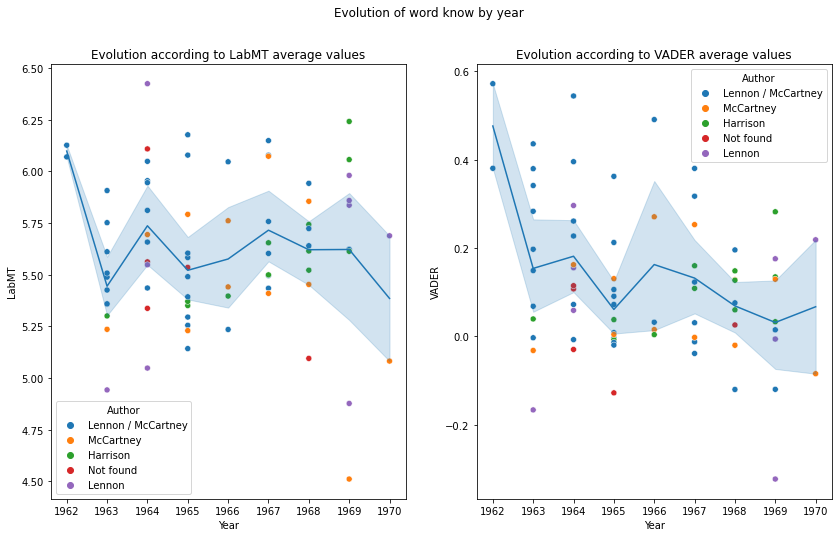

In [267]:
def word_evolution(word):
    # we first store the number of songs that contain this word (Always considering just the Golden decade)
    yes=0
    songs=[]
    for el in Lyrics_Data_Golden_Decade['Song']:
        path='lyrics_songs/'+el.replace(' ','-')+'.txt'
        if word in clean_lyrics(path):
            songs.append(el)
            yes+=1
    print('Percentage of songs containing ', word,': ',yes/len(Lyrics_Data['Song']))
    # we store it in a dataframe in order to do the corresponding plots
    word_df=Lyrics_Data_Golden_Decade[Lyrics_Data_Golden_Decade['Song'].isin(songs)]
    plt.figure(figsize=(14, 8))
    plt.suptitle('Evolution of word '+str(word)+' by year')
    plt.subplot(1,2,1)
    sns.scatterplot(data=word_df, x="Year", y="LabMT",hue="Writer")
    sns.lineplot(data=word_df, x="Year", y="LabMT") # show mean and 95% confidence interval
    plt.legend(title='Author')
    plt.title('Evolution according to LabMT average values')
    plt.subplot(1,2,2)
    sns.scatterplot(data=word_df, x="Year", y="VADER",hue="Writer")
    sns.lineplot(data=word_df, x="Year", y="VADER") # show mean and 95% confidence interval
    plt.legend(title='Author')
    plt.title('Evolution according to VADER average values')
    #plt.savefig(str(word))
    plt.show()

    
word_evolution('know')

In order to find interesting words let's see which are the most used words in all beatles songs:

In [268]:
total_words_all_songs=[]
for el in Lyrics_Data_Golden_Decade['Song']:
    path='lyrics_songs/'+el.replace(' ','-')+'.txt'
    for word in np.unique(clean_lyrics(path)):
        total_words_all_songs.append(word)
    
FreqDist(total_words_all_songs).most_common(5)

[('know', 76), ('love', 70), ('see', 57), ('time', 52), ('like', 43)]

Percentage of songs containing  love :  0.4046242774566474


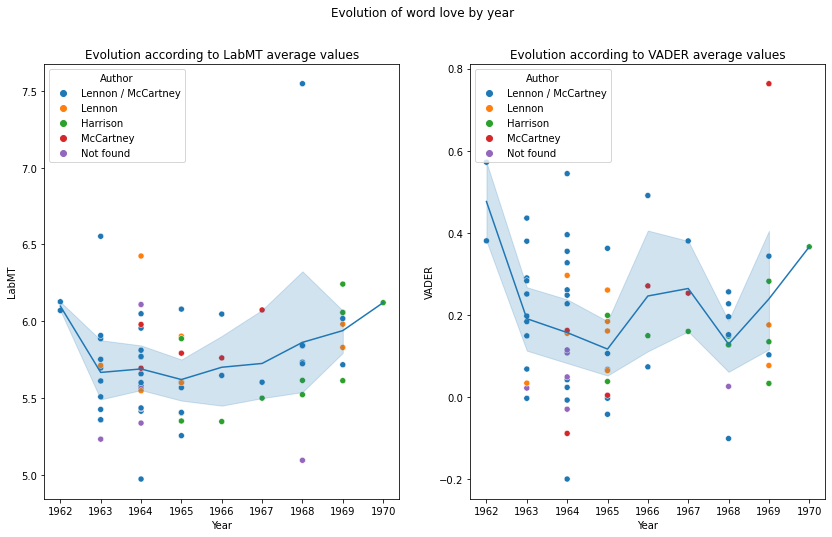

In [269]:
word_evolution('love')

Percentage of songs containing  see :  0.32947976878612717


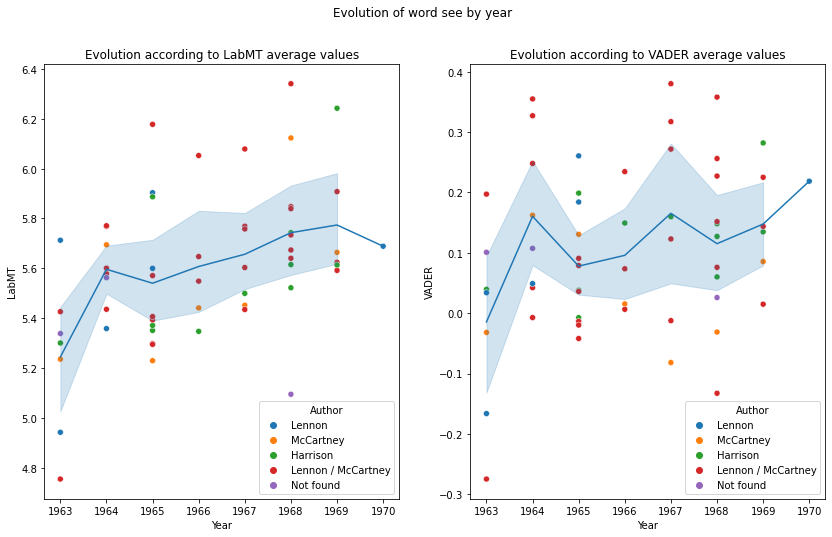

In [270]:
word_evolution('see')

Percentage of songs containing  time :  0.30057803468208094


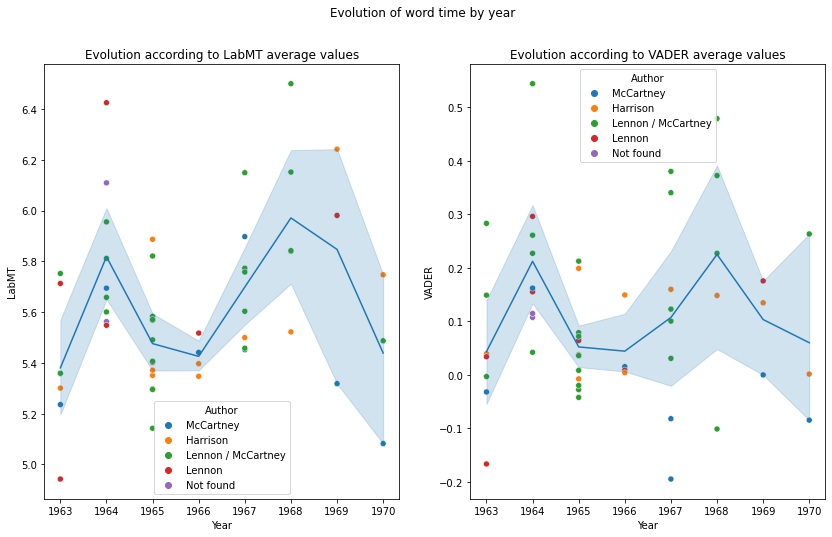

In [271]:
word_evolution('time')

Percentage of songs containing  like :  0.24855491329479767


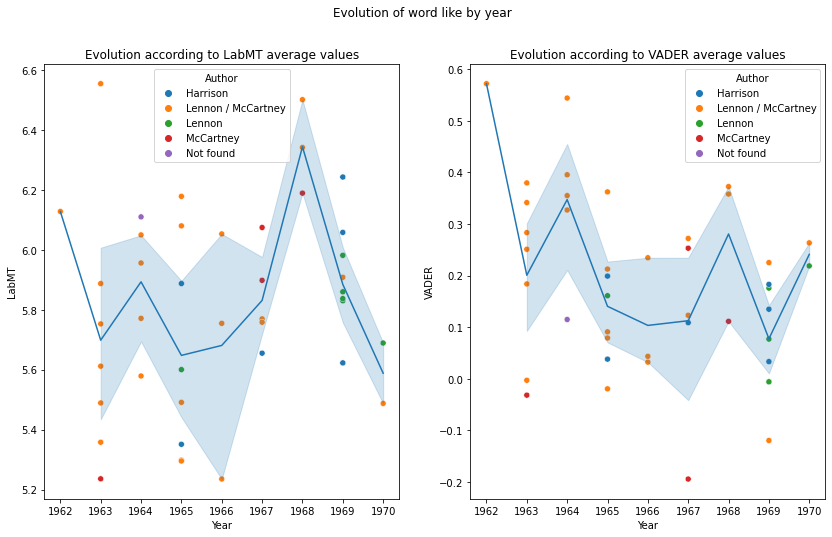

In [272]:
word_evolution('like')

## <font color='darkgreen'> 4. Discussion

## <font color='darkgreen'> 5. Contributions